# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import os
import random
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
##Part1

In [2]:
path = "data/Images"

In [4]:
image_size=(128, 128)
all_data=[]
classes=os.listdir(path)
for class_name in classes:
    class_path=os.path.join(path, class_name)
    if not os.path.isdir(class_path):
        continue
    image_paths=os.listdir(class_path)
    for image_name in image_paths:
        image_path=os.path.join(class_path, image_name)
        if not image_name.lower().endswith('.jpg'):
            continue
        image=cv2.imread(image_path)
        if image is None:
            continue
        image=cv2.resize(image, image_size)
        image=image / 255.0 
        all_data.append((image, class_name))




In [5]:
print(f"Total Image Count: {len(all_data)}")


Total Image Count: 9679


In [6]:
train_ratio=0.7
test_ratio=0.15
validation_ratio=0.15
train_data=[]
validation_data=[]
test_data=[]

In [7]:
class_data={}
for img, label in all_data:
    if label not in class_data:
        class_data[label]=[]
    class_data[label].append((img, label))

In [8]:
for label, items in class_data.items():
    random.shuffle(items)
    train, temp=train_test_split(items, test_size=(validation_ratio + test_ratio))
    val, test=train_test_split(temp, test_size=(test_ratio / (validation_ratio + test_ratio)))
    train_data.extend(train)
    validation_data.extend(val)
    test_data.extend(test)

In [9]:
print(f"len train: {len(train_data)}")
print(f"len validation: {len(validation_data)}")
print(f"len test: {len(test_data)}")

len train: 6765
len validation: 1453
len test: 1461


In [10]:
import numpy as np
def prepare_data(data_list):
    x=np.array([item[0] for item in data_list])
    y=np.array([classes.index(item[1]) for item in data_list])
    return x,y

In [11]:
x_train, y_train = prepare_data(train_data)
x_val, y_val = prepare_data(validation_data)
x_test, y_test = prepare_data(test_data)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
learning_rates = [0.001, 0.0005, 0.0001]
batch_sizes = [32, 64]
dropout_values = [0.3, 0.5,  0.8]
results=[]

Case-> Learning Rate: 0.001, Batch Size: 32, Dropout: 0.3
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 32s 143ms/step - accuracy: 0.0829 - loss: 3.0572 - val_accuracy: 0.1473 - val_loss: 2.7670
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1789 - loss: 2.7032 - val_accuracy: 0.2244 - val_loss: 2.5145
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.2359 - loss: 2.4435 - val_accuracy: 0.2636 - val_loss: 2.3724
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.3078 - loss: 2.2076 - val_accuracy: 0.3042 - val_loss: 2.2581
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.3973 - loss: 1.9191 - val_accuracy: 0.3228 - val_loss: 2.2143
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.4798 - loss: 1.6507 - val_accuracy: 0.3365 - val_loss: 2.2502
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.5803 - loss: 1.3372 - val_accuracy: 0.3166 - val_loss: 2.4214
Epoch 8/25
212/212 ━━━━━━

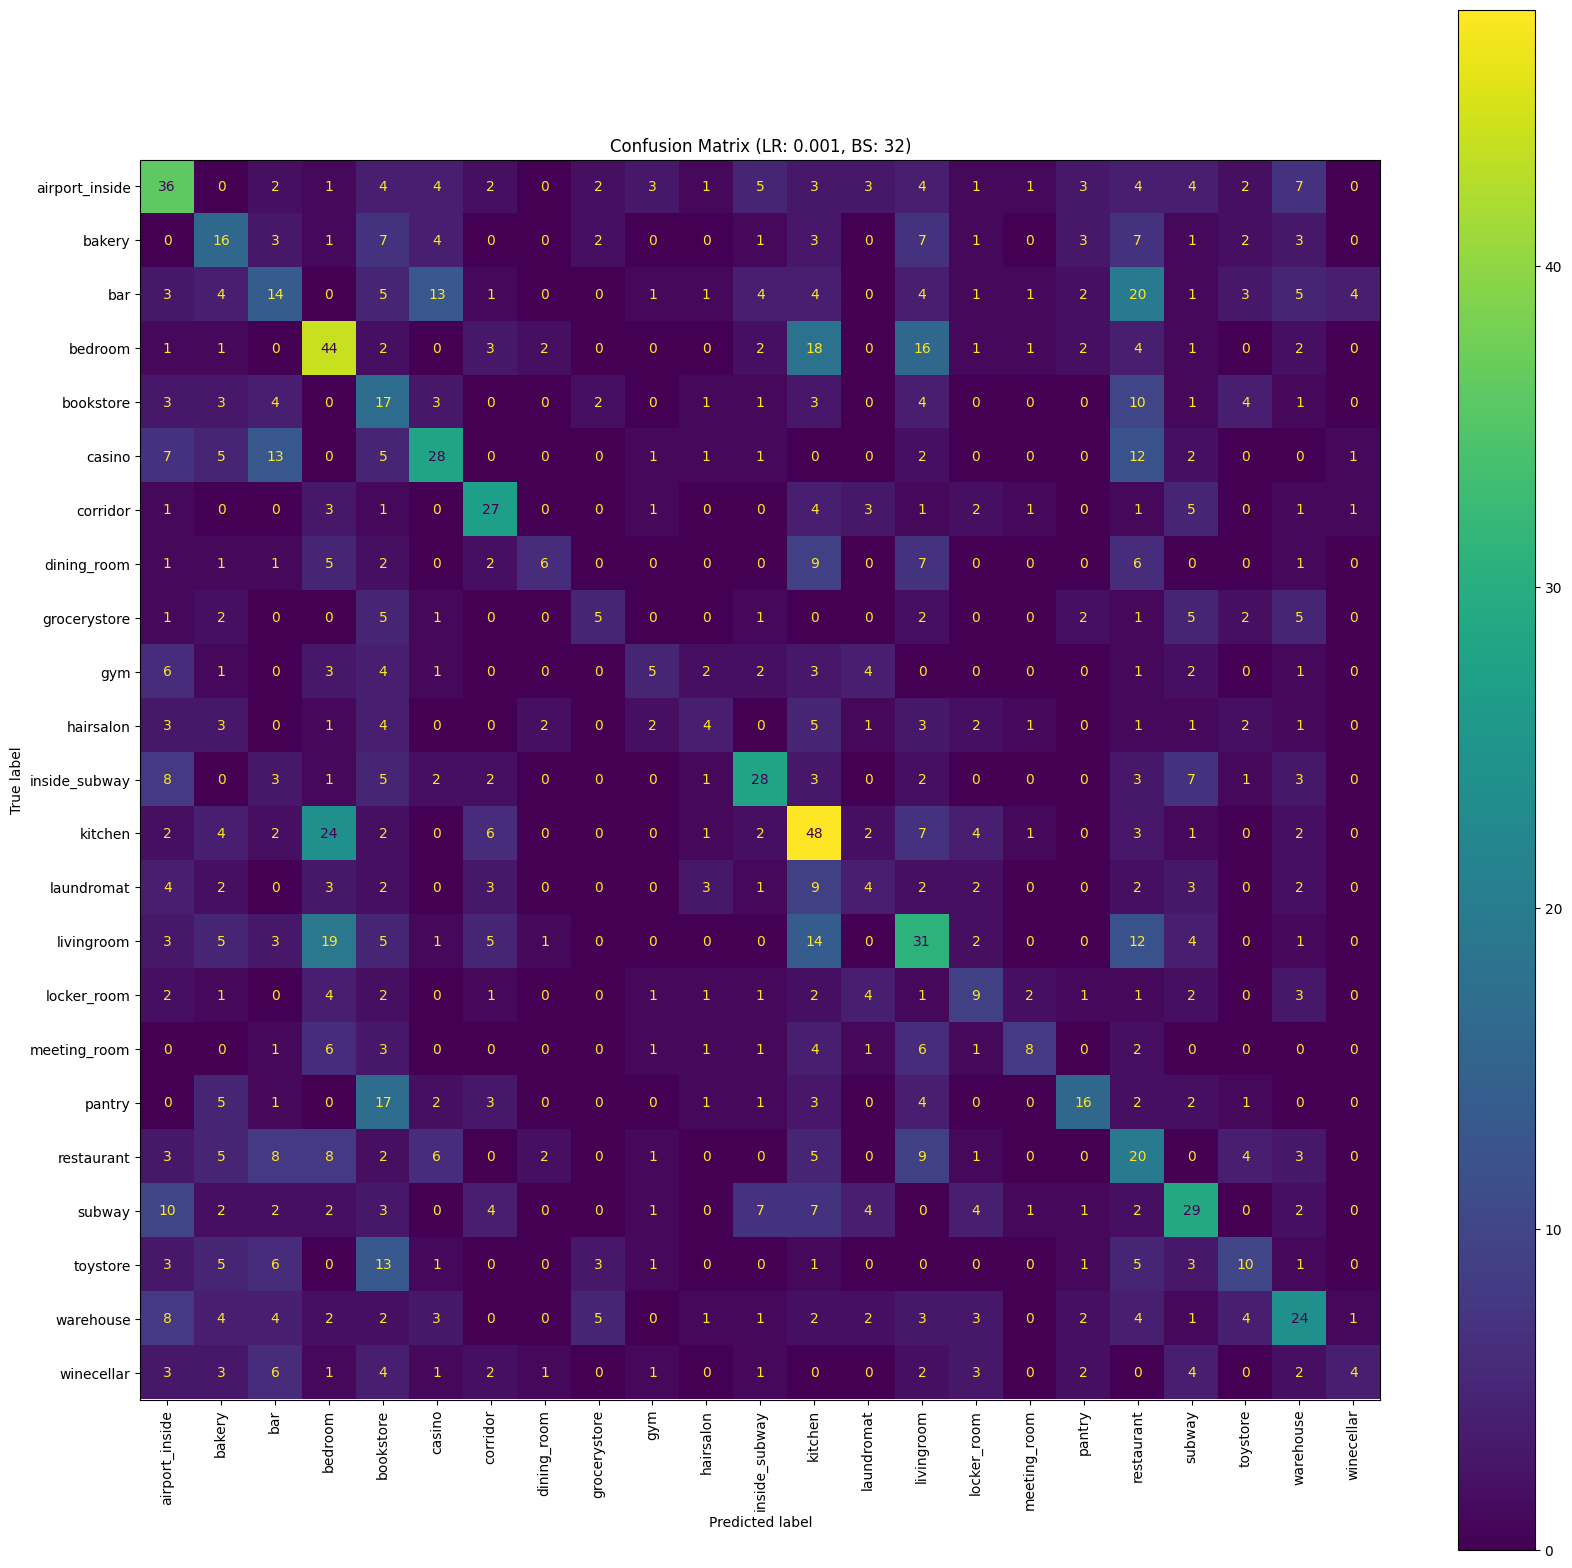

Case-> Learning Rate: 0.001, Batch Size: 32, Dropout: 0.5
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.0909 - loss: 3.0756 - val_accuracy: 0.1507 - val_loss: 2.8297
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1472 - loss: 2.8116 - val_accuracy: 0.1968 - val_loss: 2.5909
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1865 - loss: 2.6380 - val_accuracy: 0.2361 - val_loss: 2.5134
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.2318 - loss: 2.4758 - val_accuracy: 0.2581 - val_loss: 2.3863
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.2607 - loss: 2.3575 - val_accuracy: 0.2808 - val_loss: 2.2976
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.3087 - loss: 2.1822 - val_accuracy: 0.3104 - val_loss: 2.1991
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.3752 - loss: 1.9735 - val_accuracy: 0.3207 - val_loss: 2.1972
Epoch 8/25
212/212 ━━━━━━

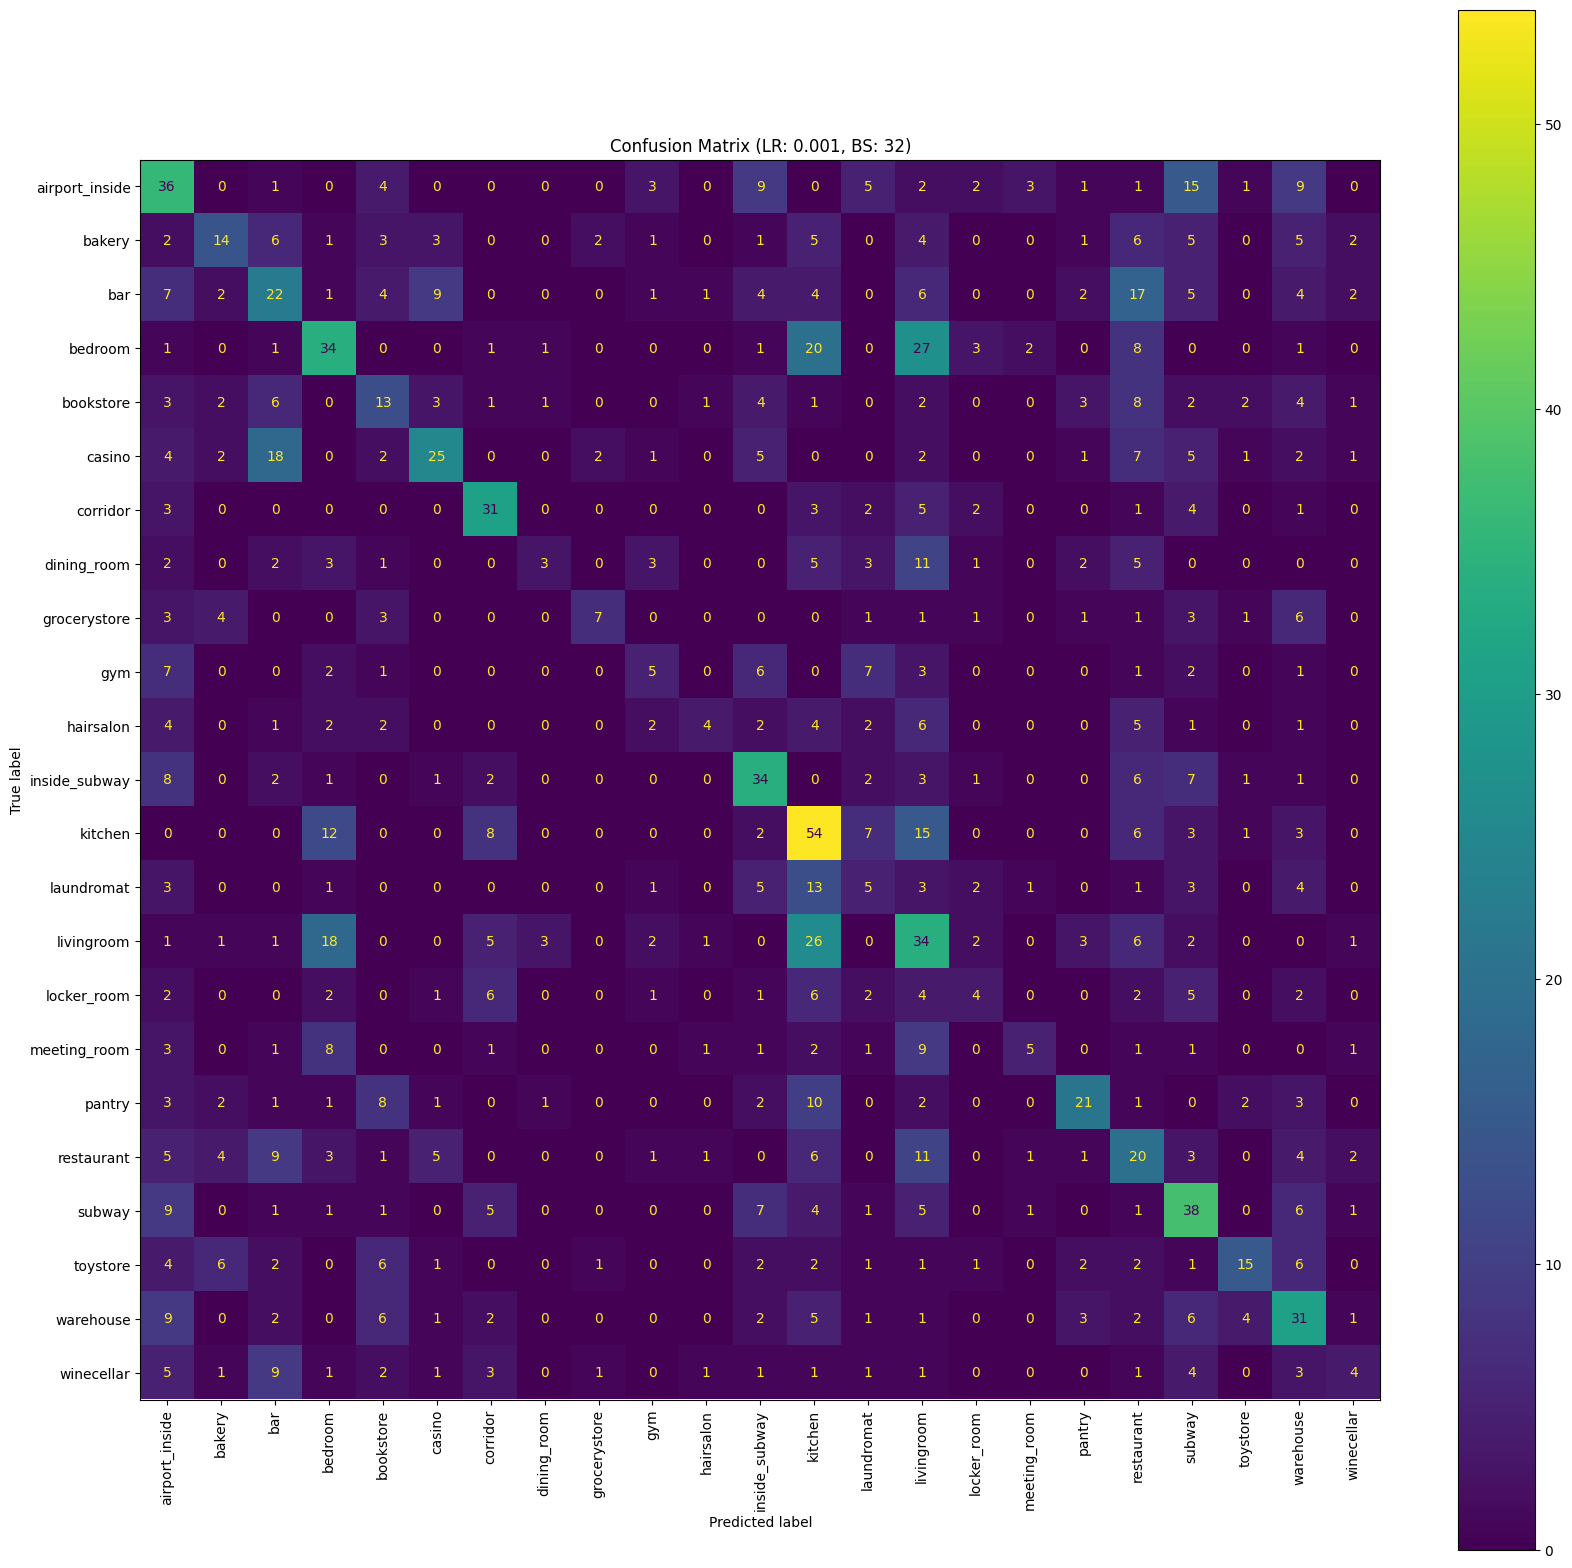

Case-> Learning Rate: 0.001, Batch Size: 32, Dropout: 0.8
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.0714 - loss: 3.1579 - val_accuracy: 0.1253 - val_loss: 2.9358
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.0959 - loss: 3.0068 - val_accuracy: 0.1411 - val_loss: 2.8583
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.1093 - loss: 2.9214 - val_accuracy: 0.1555 - val_loss: 2.8053
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1352 - loss: 2.8583 - val_accuracy: 0.1425 - val_loss: 2.8088
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.1412 - loss: 2.8349 - val_accuracy: 0.1672 - val_loss: 2.6791
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.1495 - loss: 2.8127 - val_accuracy: 0.2010 - val_loss: 2.6359
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1547 - loss: 2.7122 - val_accuracy: 0.1927 - val_loss: 2.6538
Epoch 8/25
212/212 ━━━━━━

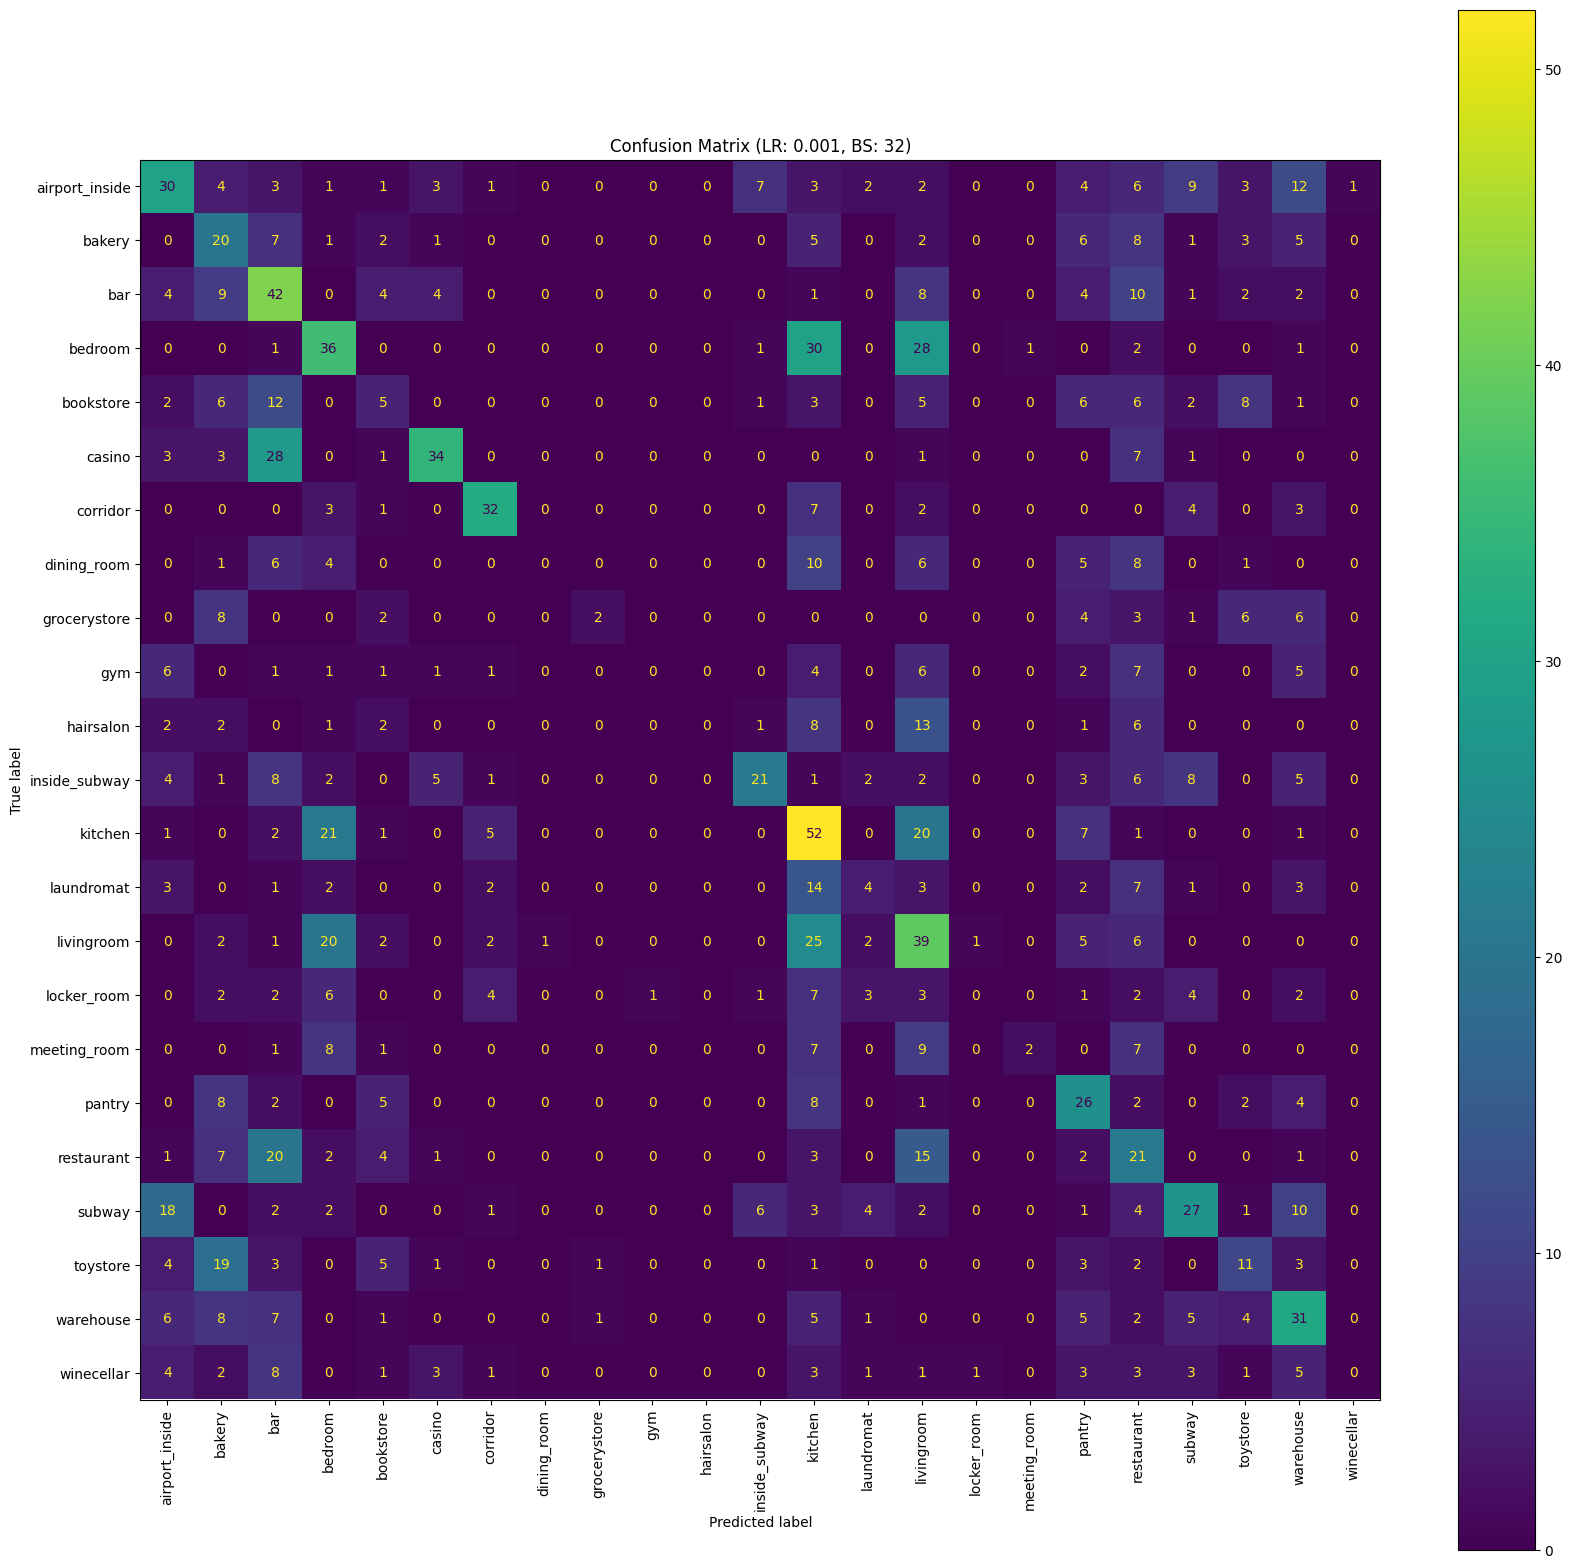

Case-> Learning Rate: 0.001, Batch Size: 64, Dropout: 0.3
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.0966 - loss: 3.0504 - val_accuracy: 0.1679 - val_loss: 2.7380
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.1746 - loss: 2.7355 - val_accuracy: 0.2072 - val_loss: 2.5427
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.2086 - loss: 2.5358 - val_accuracy: 0.2595 - val_loss: 2.4214
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 24s 230ms/step - accuracy: 0.2712 - loss: 2.3629 - val_accuracy: 0.2698 - val_loss: 2.3451
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.3147 - loss: 2.1760 - val_accuracy: 0.3111 - val_loss: 2.2522
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.3850 - loss: 1.9601 - val_accuracy: 0.3235 - val_loss: 2.2295
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.4524 - loss: 1.7132 - val_accuracy: 0.3166 - val_loss: 2.3036
Epoch 8/25
106/106 ━━━━━━

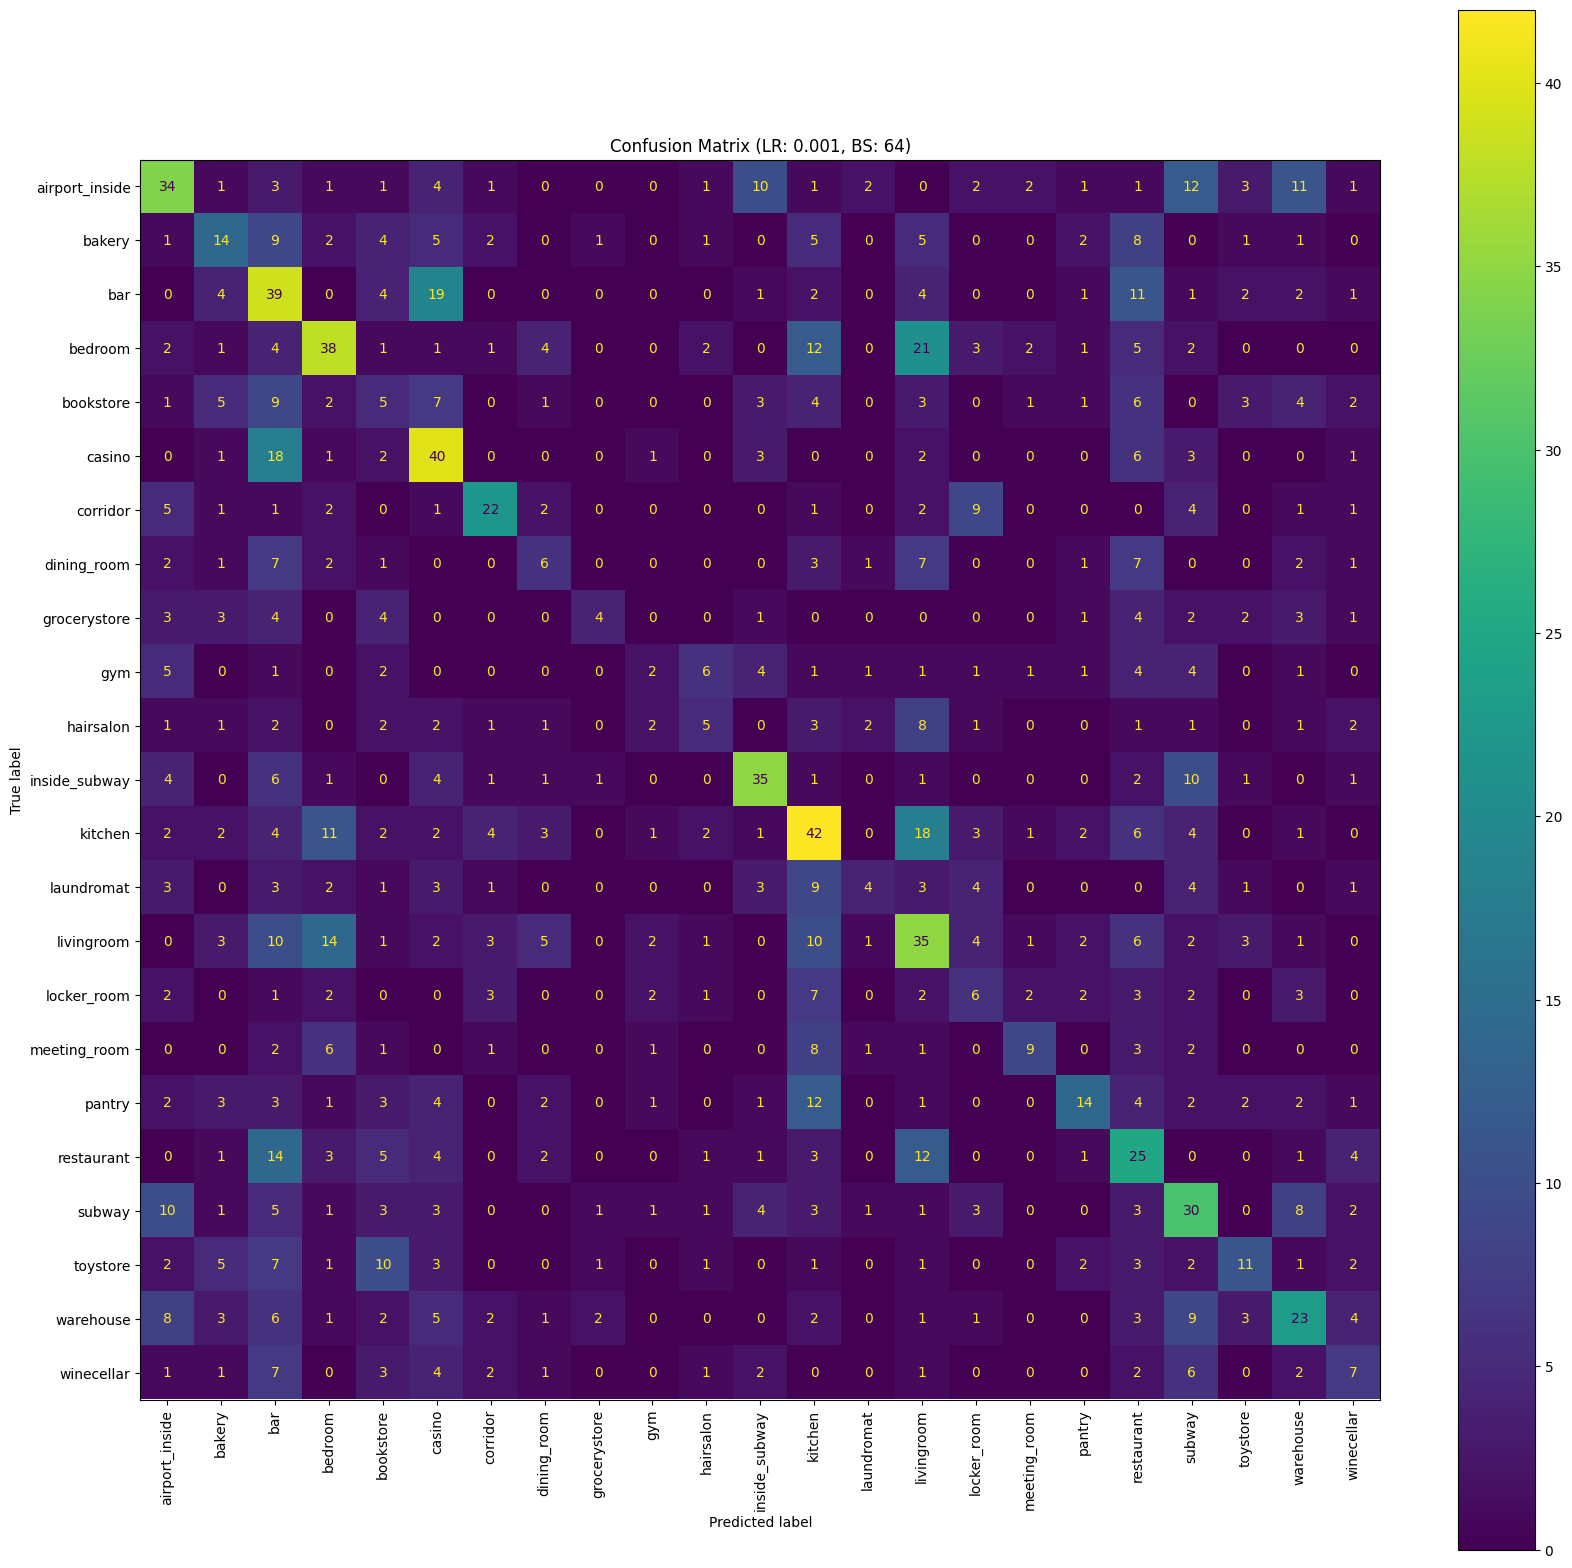

Case-> Learning Rate: 0.001, Batch Size: 64, Dropout: 0.5
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 244ms/step - accuracy: 0.0872 - loss: 3.0780 - val_accuracy: 0.1666 - val_loss: 2.7665
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 240ms/step - accuracy: 0.1538 - loss: 2.8287 - val_accuracy: 0.1893 - val_loss: 2.6056
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 238ms/step - accuracy: 0.2067 - loss: 2.6207 - val_accuracy: 0.2333 - val_loss: 2.4569
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 238ms/step - accuracy: 0.2255 - loss: 2.4822 - val_accuracy: 0.2533 - val_loss: 2.3685
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 26s 245ms/step - accuracy: 0.2848 - loss: 2.3081 - val_accuracy: 0.2946 - val_loss: 2.2741
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.3002 - loss: 2.1817 - val_accuracy: 0.3166 - val_loss: 2.2168
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 26s 241ms/step - accuracy: 0.3513 - loss: 2.0305 - val_accuracy: 0.3242 - val_loss: 2.2130
Epoch 8/25
106/106 ━━━━━━

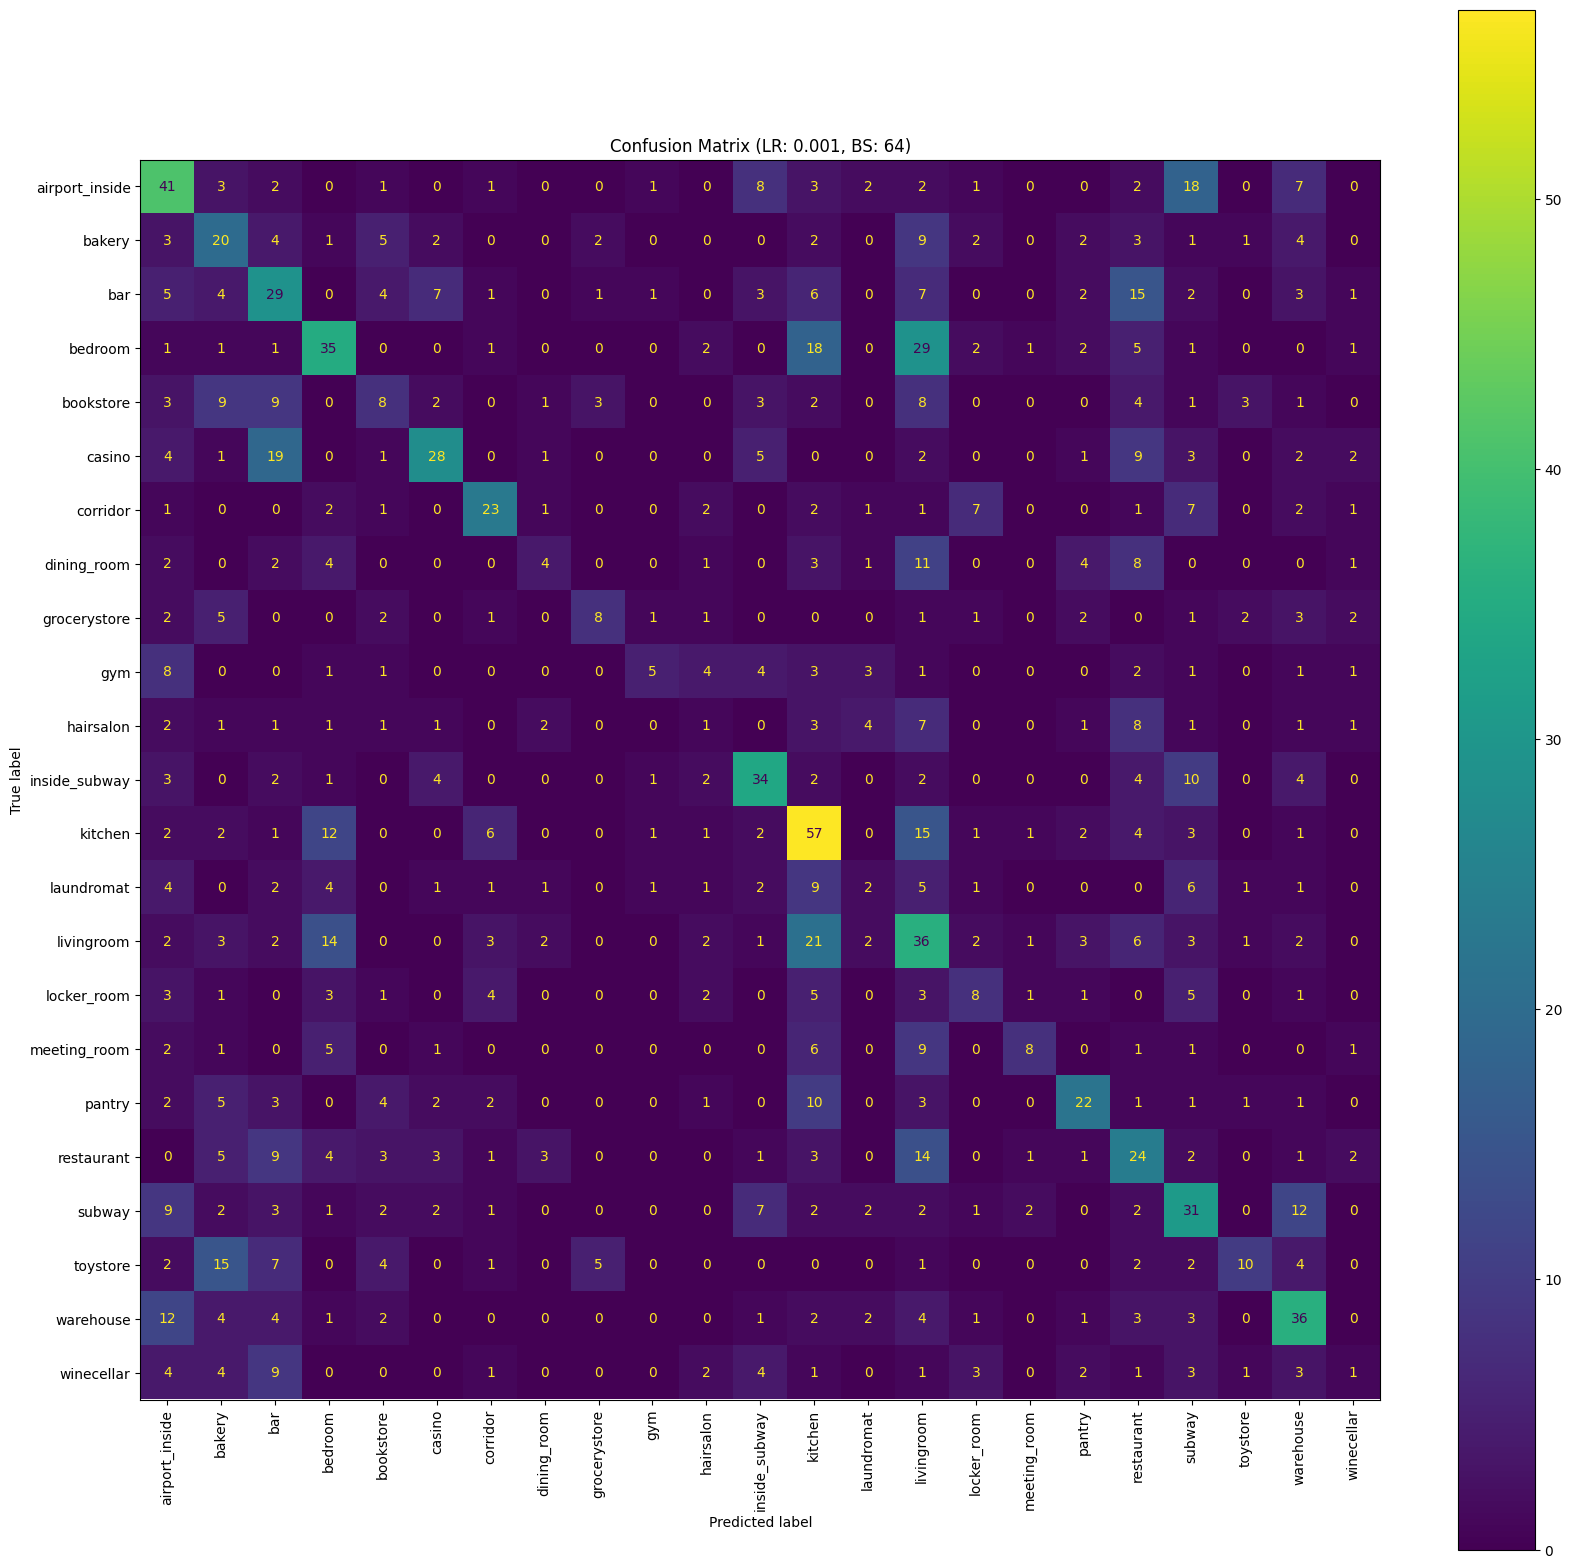

Case-> Learning Rate: 0.001, Batch Size: 64, Dropout: 0.8
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 245ms/step - accuracy: 0.0545 - loss: 3.2603 - val_accuracy: 0.0929 - val_loss: 3.0480
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.0768 - loss: 3.0742 - val_accuracy: 0.1108 - val_loss: 2.9867
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - accuracy: 0.1091 - loss: 3.0078 - val_accuracy: 0.1390 - val_loss: 2.8445
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - accuracy: 0.1224 - loss: 2.9072 - val_accuracy: 0.1624 - val_loss: 2.7930
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.1511 - loss: 2.8206 - val_accuracy: 0.1900 - val_loss: 2.7139
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.1659 - loss: 2.7370 - val_accuracy: 0.2078 - val_loss: 2.5825
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - accuracy: 0.1781 - loss: 2.6760 - val_accuracy: 0.2051 - val_loss: 2.5356
Epoch 8/25
106/106 ━━━━━━

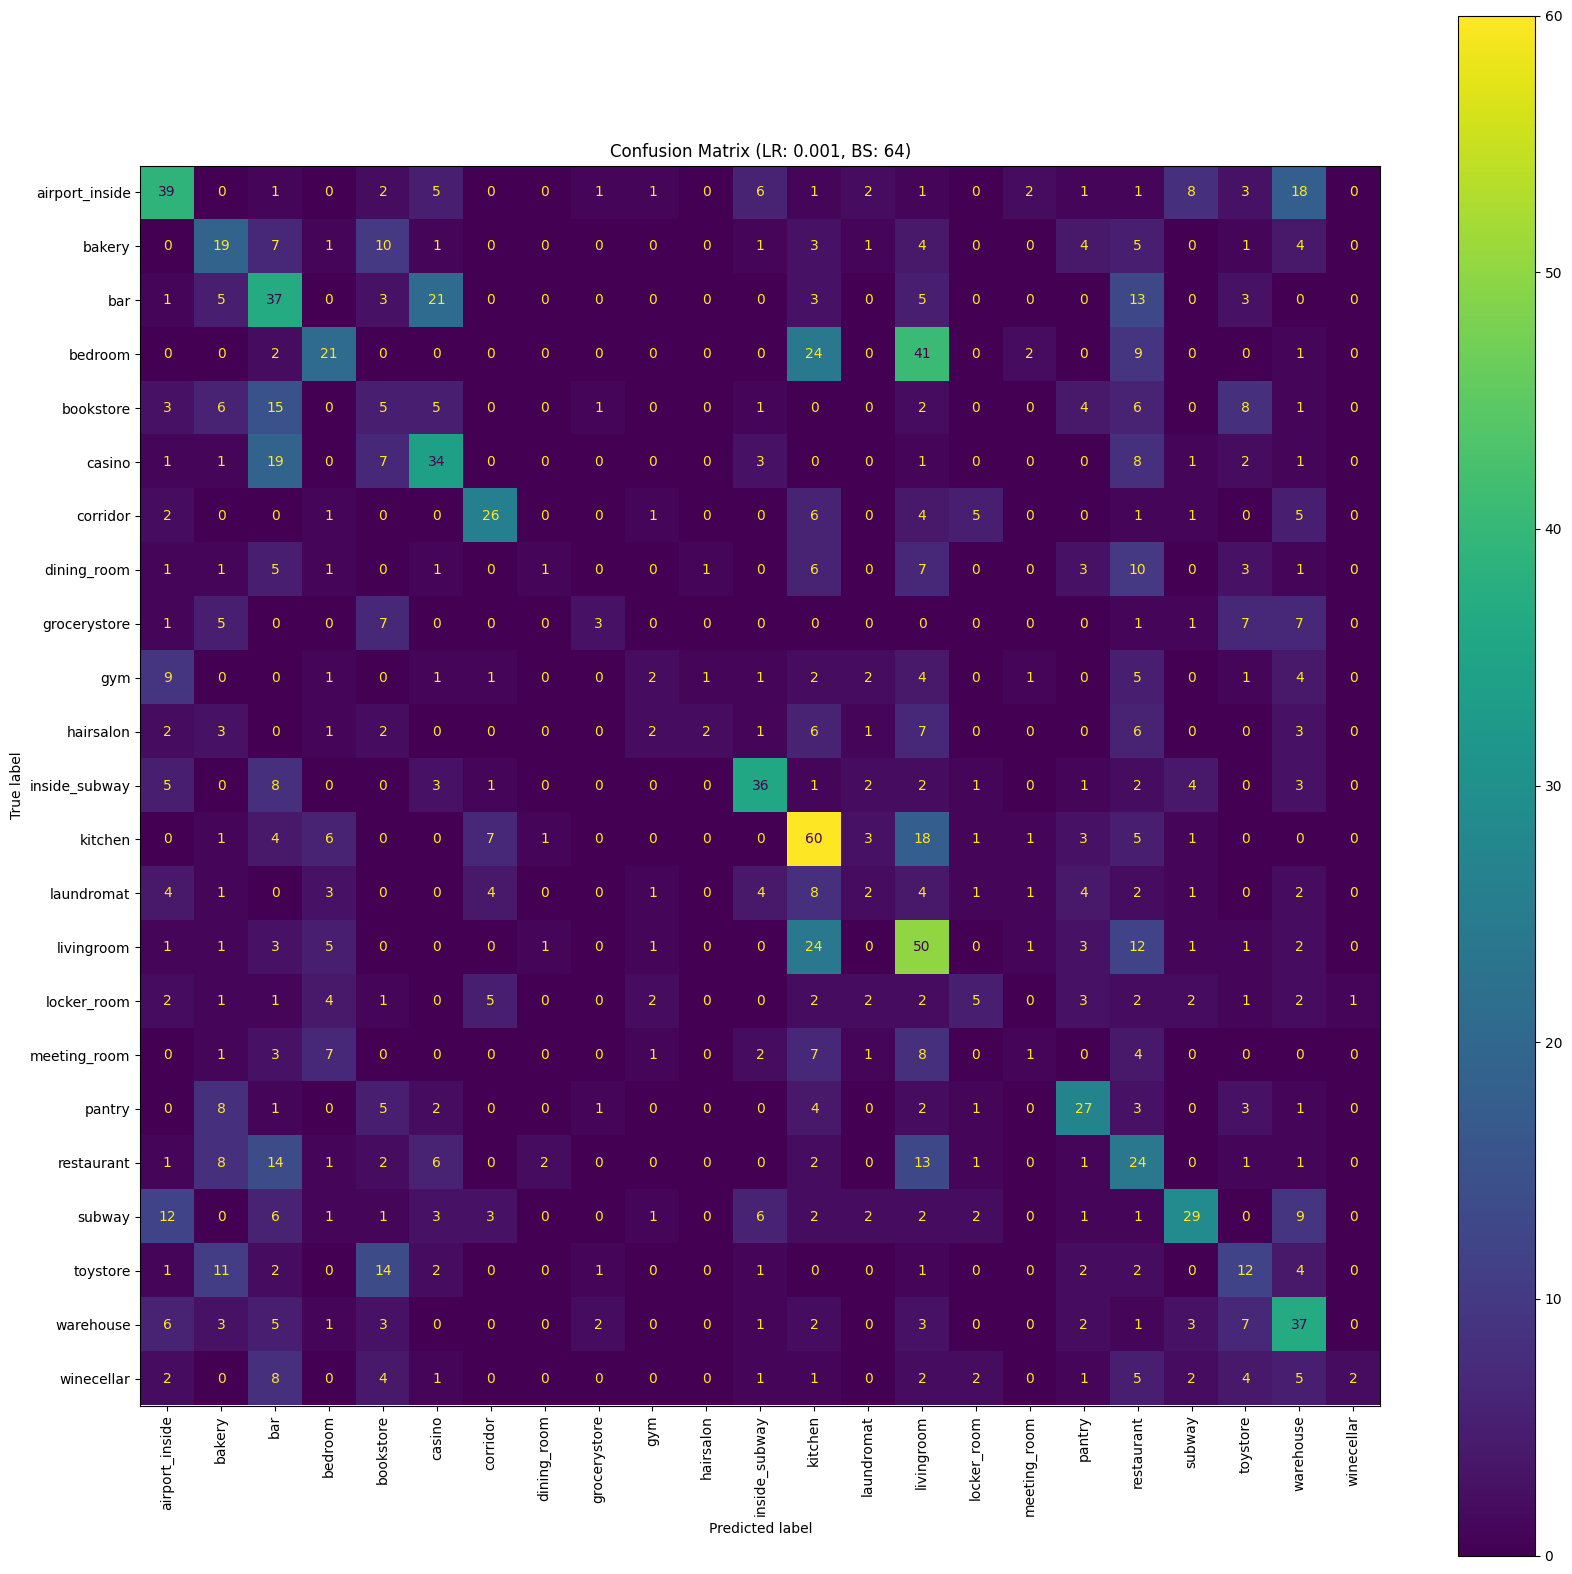

Case-> Learning Rate: 0.0005, Batch Size: 32, Dropout: 0.3
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - accuracy: 0.1099 - loss: 2.9829 - val_accuracy: 0.2099 - val_loss: 2.6152
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.2211 - loss: 2.5725 - val_accuracy: 0.2498 - val_loss: 2.4037
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.2716 - loss: 2.3450 - val_accuracy: 0.2836 - val_loss: 2.3003
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.3518 - loss: 2.0705 - val_accuracy: 0.3028 - val_loss: 2.2305
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.4300 - loss: 1.8252 - val_accuracy: 0.3090 - val_loss: 2.2212
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.5265 - loss: 1.4847 - val_accuracy: 0.3104 - val_loss: 2.3309
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.6002 - loss: 1.2308 - val_accuracy: 0.2939 - val_loss: 2.5812
Epoch 8/25
212/212 ━━━━━

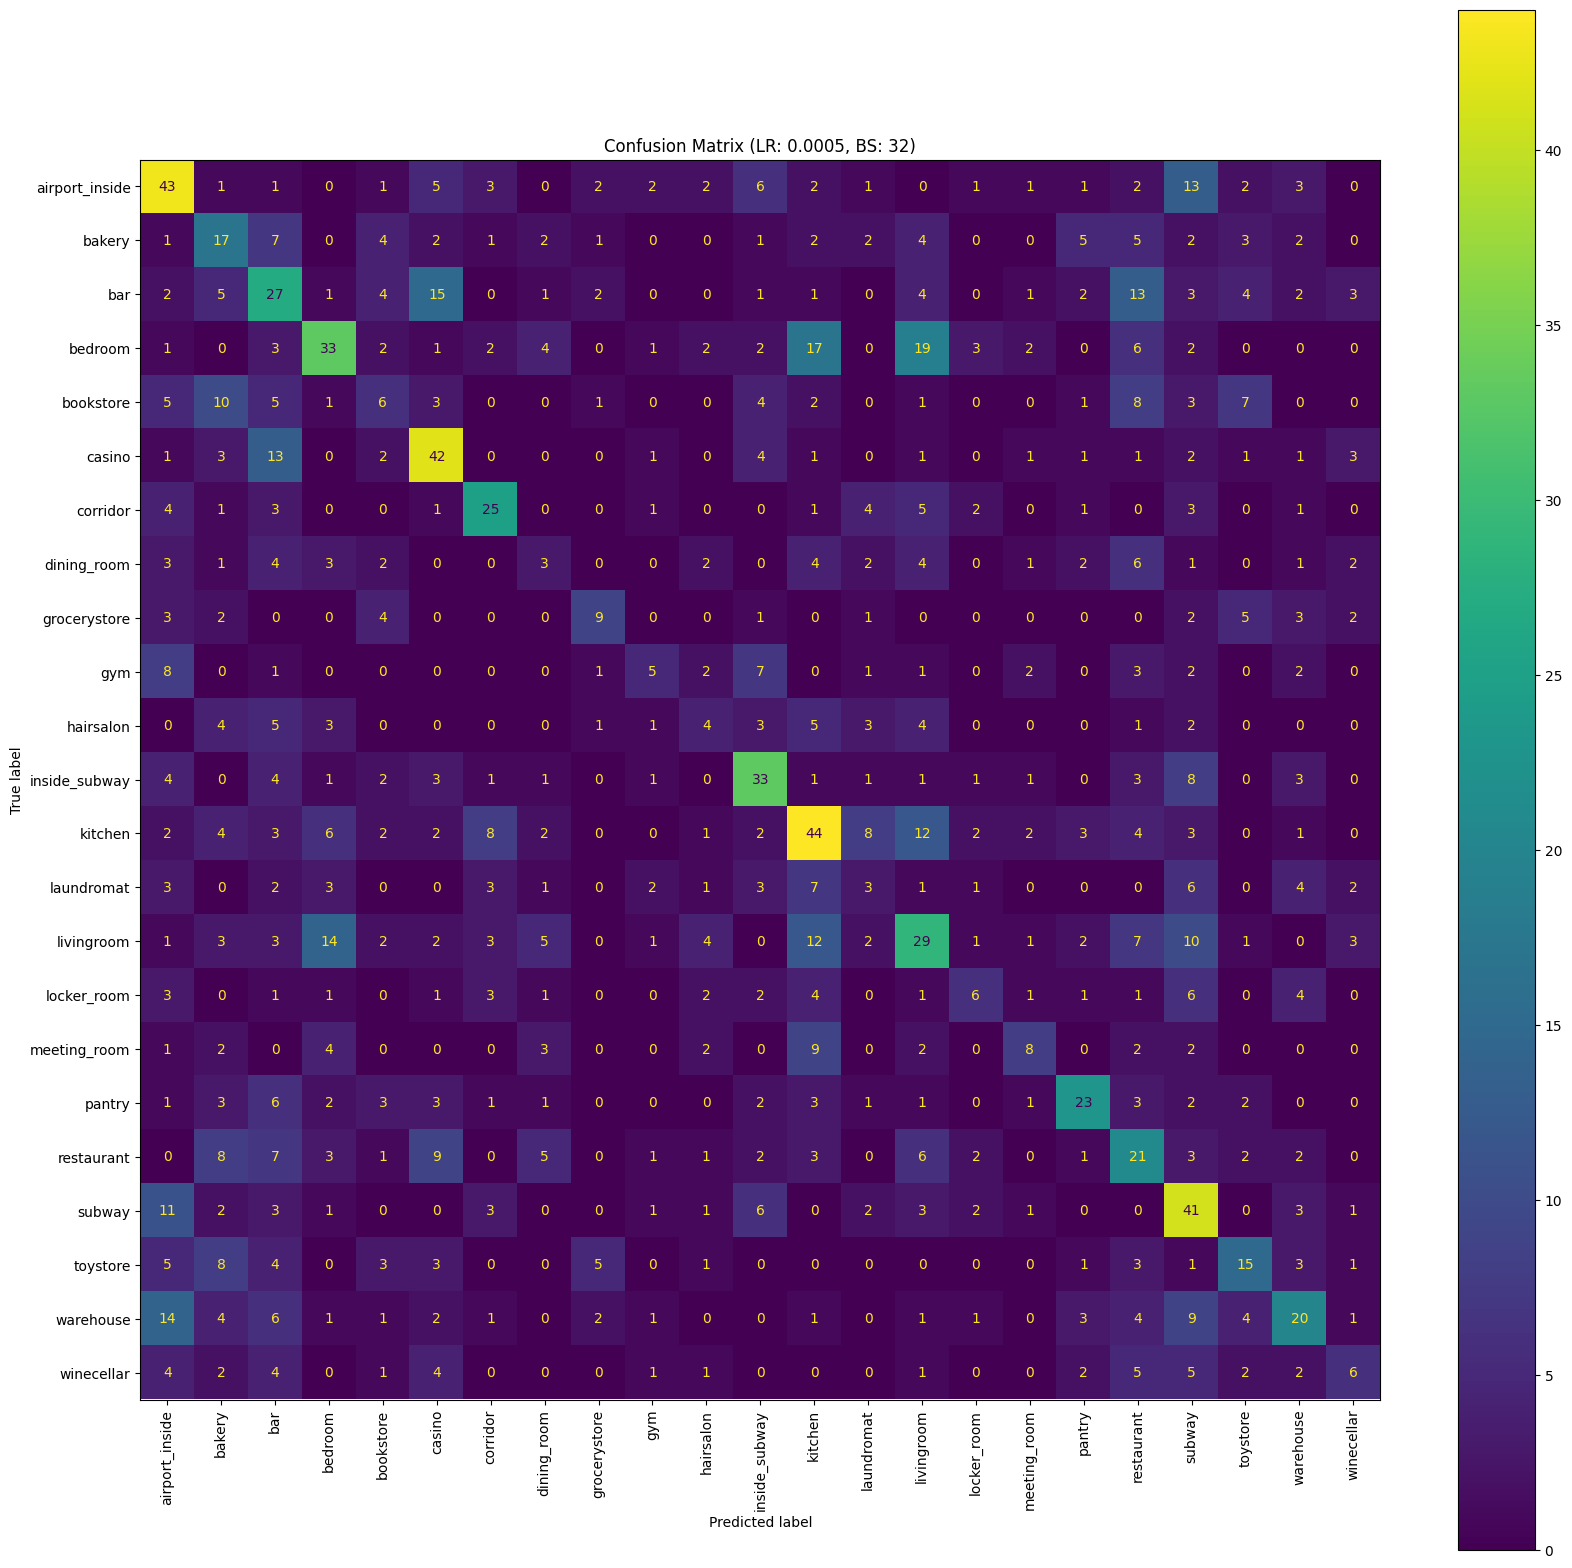

Case-> Learning Rate: 0.0005, Batch Size: 32, Dropout: 0.5
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.0930 - loss: 3.0772 - val_accuracy: 0.1521 - val_loss: 2.8208
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.1462 - loss: 2.8156 - val_accuracy: 0.1748 - val_loss: 2.6544
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.1897 - loss: 2.6706 - val_accuracy: 0.2409 - val_loss: 2.5624
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.2242 - loss: 2.5389 - val_accuracy: 0.2698 - val_loss: 2.4396
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.2527 - loss: 2.4166 - val_accuracy: 0.2705 - val_loss: 2.3922
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.3010 - loss: 2.2312 - val_accuracy: 0.3001 - val_loss: 2.2758
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.3494 - loss: 2.0413 - val_accuracy: 0.3042 - val_loss: 2.2672
Epoch 8/25
212/212 ━━━━━

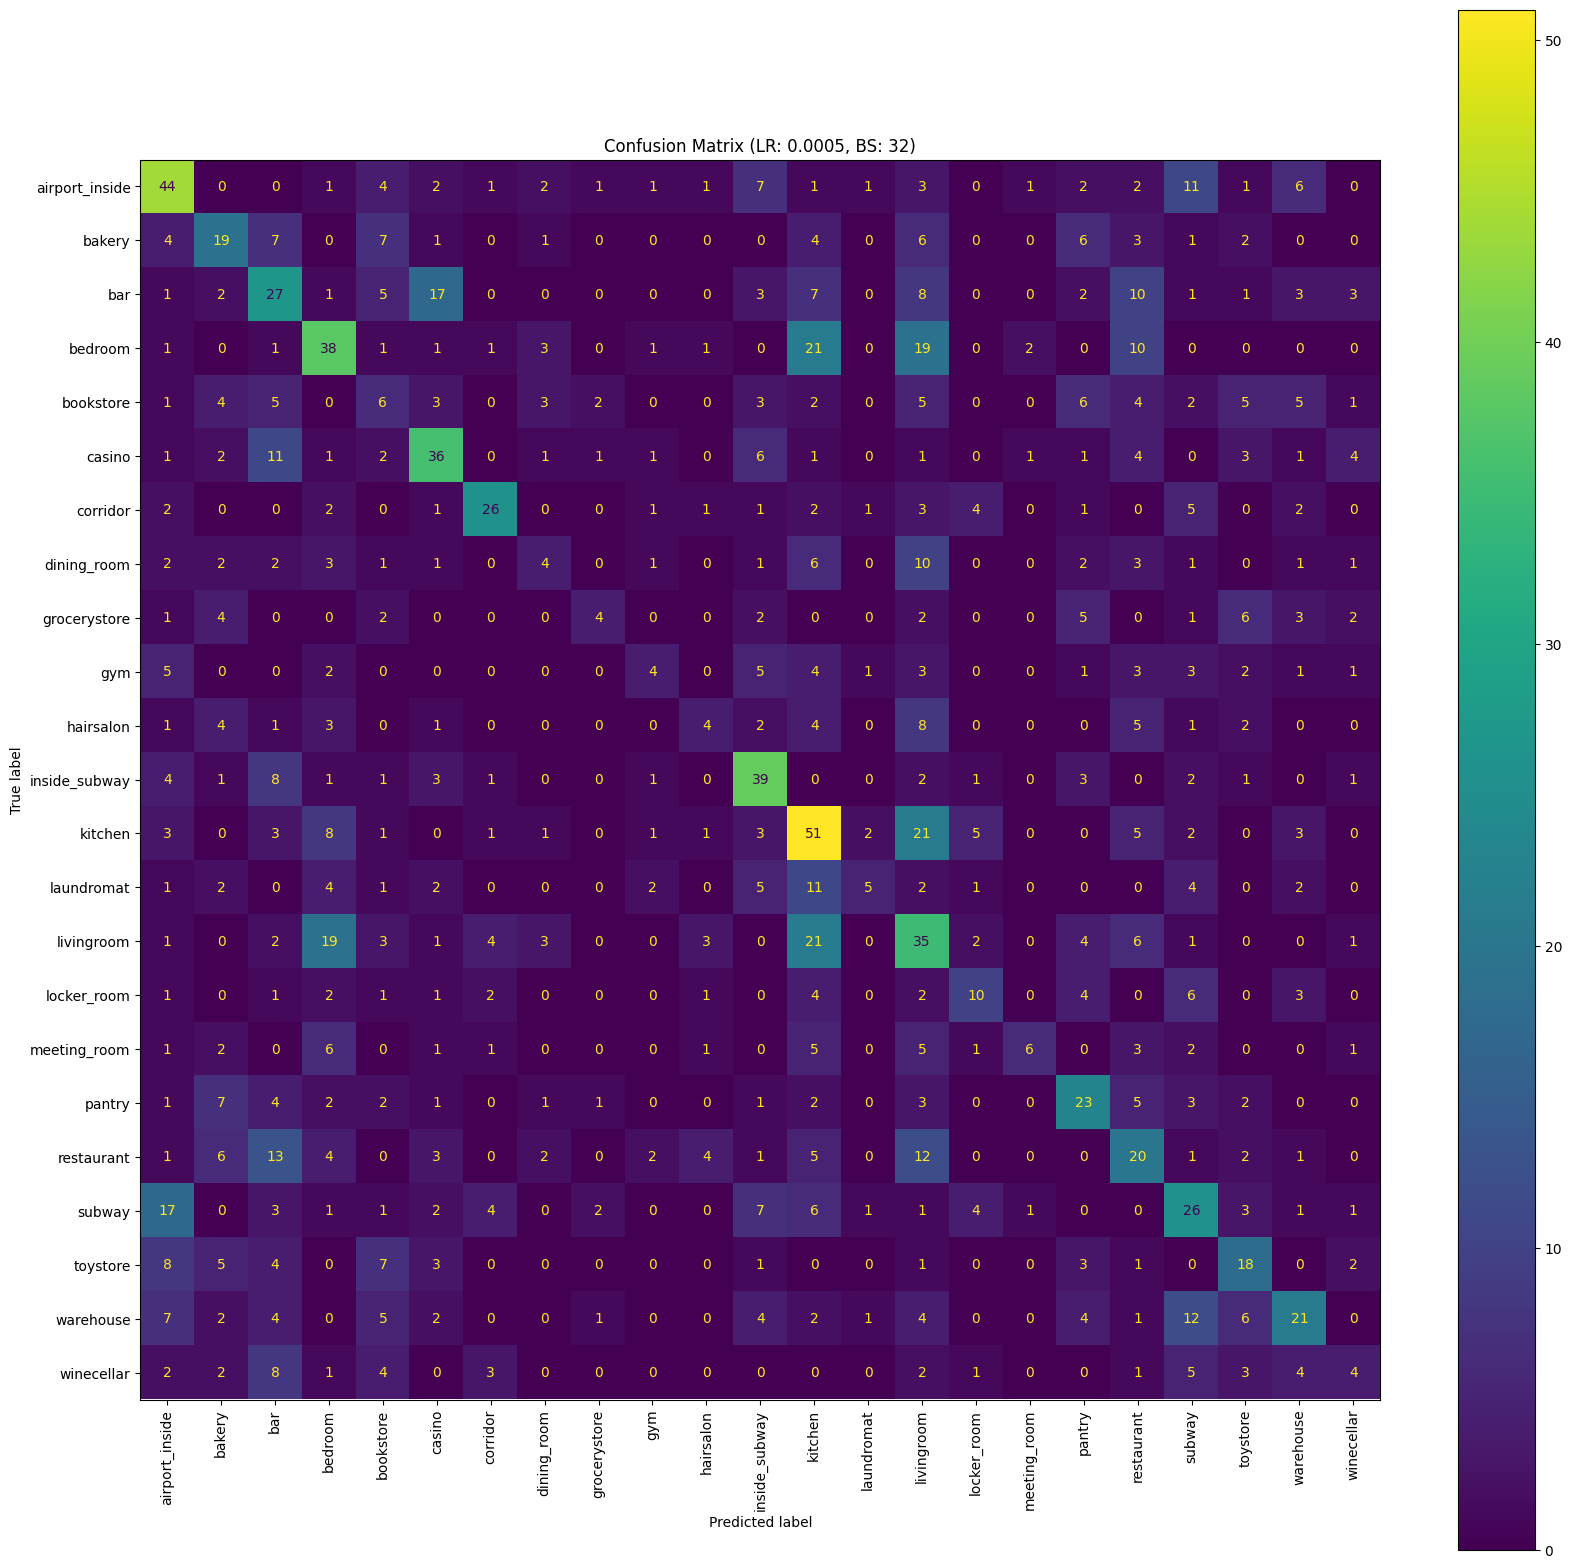

Case-> Learning Rate: 0.0005, Batch Size: 32, Dropout: 0.8
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.0692 - loss: 3.1360 - val_accuracy: 0.1418 - val_loss: 2.9629
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.0975 - loss: 3.0158 - val_accuracy: 0.1294 - val_loss: 2.8830
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.1381 - loss: 2.8998 - val_accuracy: 0.1734 - val_loss: 2.7632
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1585 - loss: 2.8243 - val_accuracy: 0.1927 - val_loss: 2.6874
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.1558 - loss: 2.7892 - val_accuracy: 0.2106 - val_loss: 2.6366
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.1751 - loss: 2.7286 - val_accuracy: 0.2140 - val_loss: 2.5939
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.1798 - loss: 2.6539 - val_accuracy: 0.2340 - val_loss: 2.5290
Epoch 8/25
212/212 ━━━━━

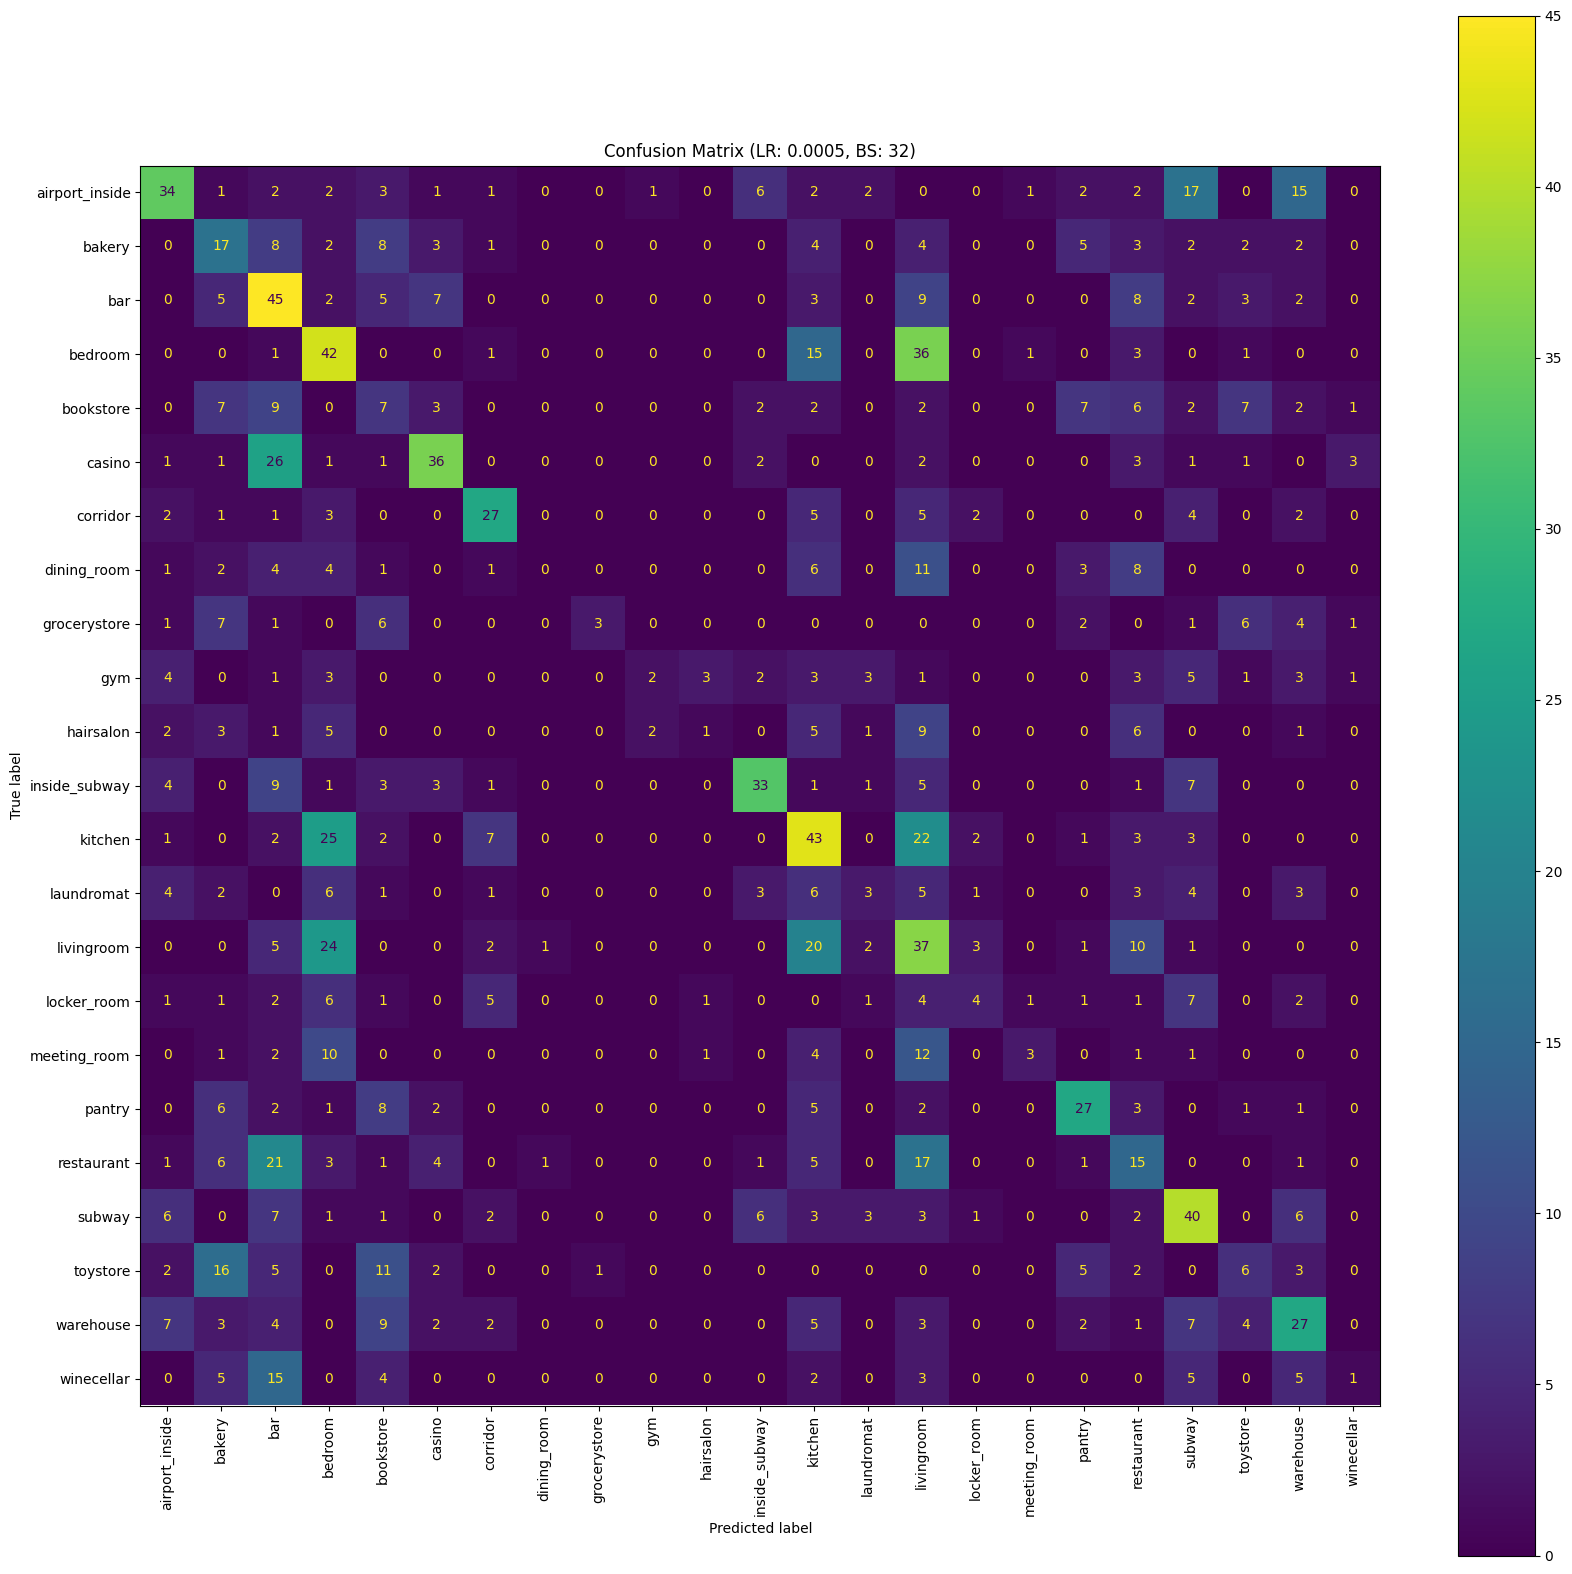

Case-> Learning Rate: 0.0005, Batch Size: 64, Dropout: 0.3
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 246ms/step - accuracy: 0.1043 - loss: 3.0057 - val_accuracy: 0.1838 - val_loss: 2.6857
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 238ms/step - accuracy: 0.1876 - loss: 2.6850 - val_accuracy: 0.2395 - val_loss: 2.5373
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 238ms/step - accuracy: 0.2462 - loss: 2.4661 - val_accuracy: 0.2808 - val_loss: 2.3779
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.3189 - loss: 2.2270 - val_accuracy: 0.2897 - val_loss: 2.3178
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.3732 - loss: 2.0274 - val_accuracy: 0.3138 - val_loss: 2.2600
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 238ms/step - accuracy: 0.4553 - loss: 1.7570 - val_accuracy: 0.3187 - val_loss: 2.2998
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.5278 - loss: 1.5150 - val_accuracy: 0.3242 - val_loss: 2.2563
Epoch 8/25
106/106 ━━━━━

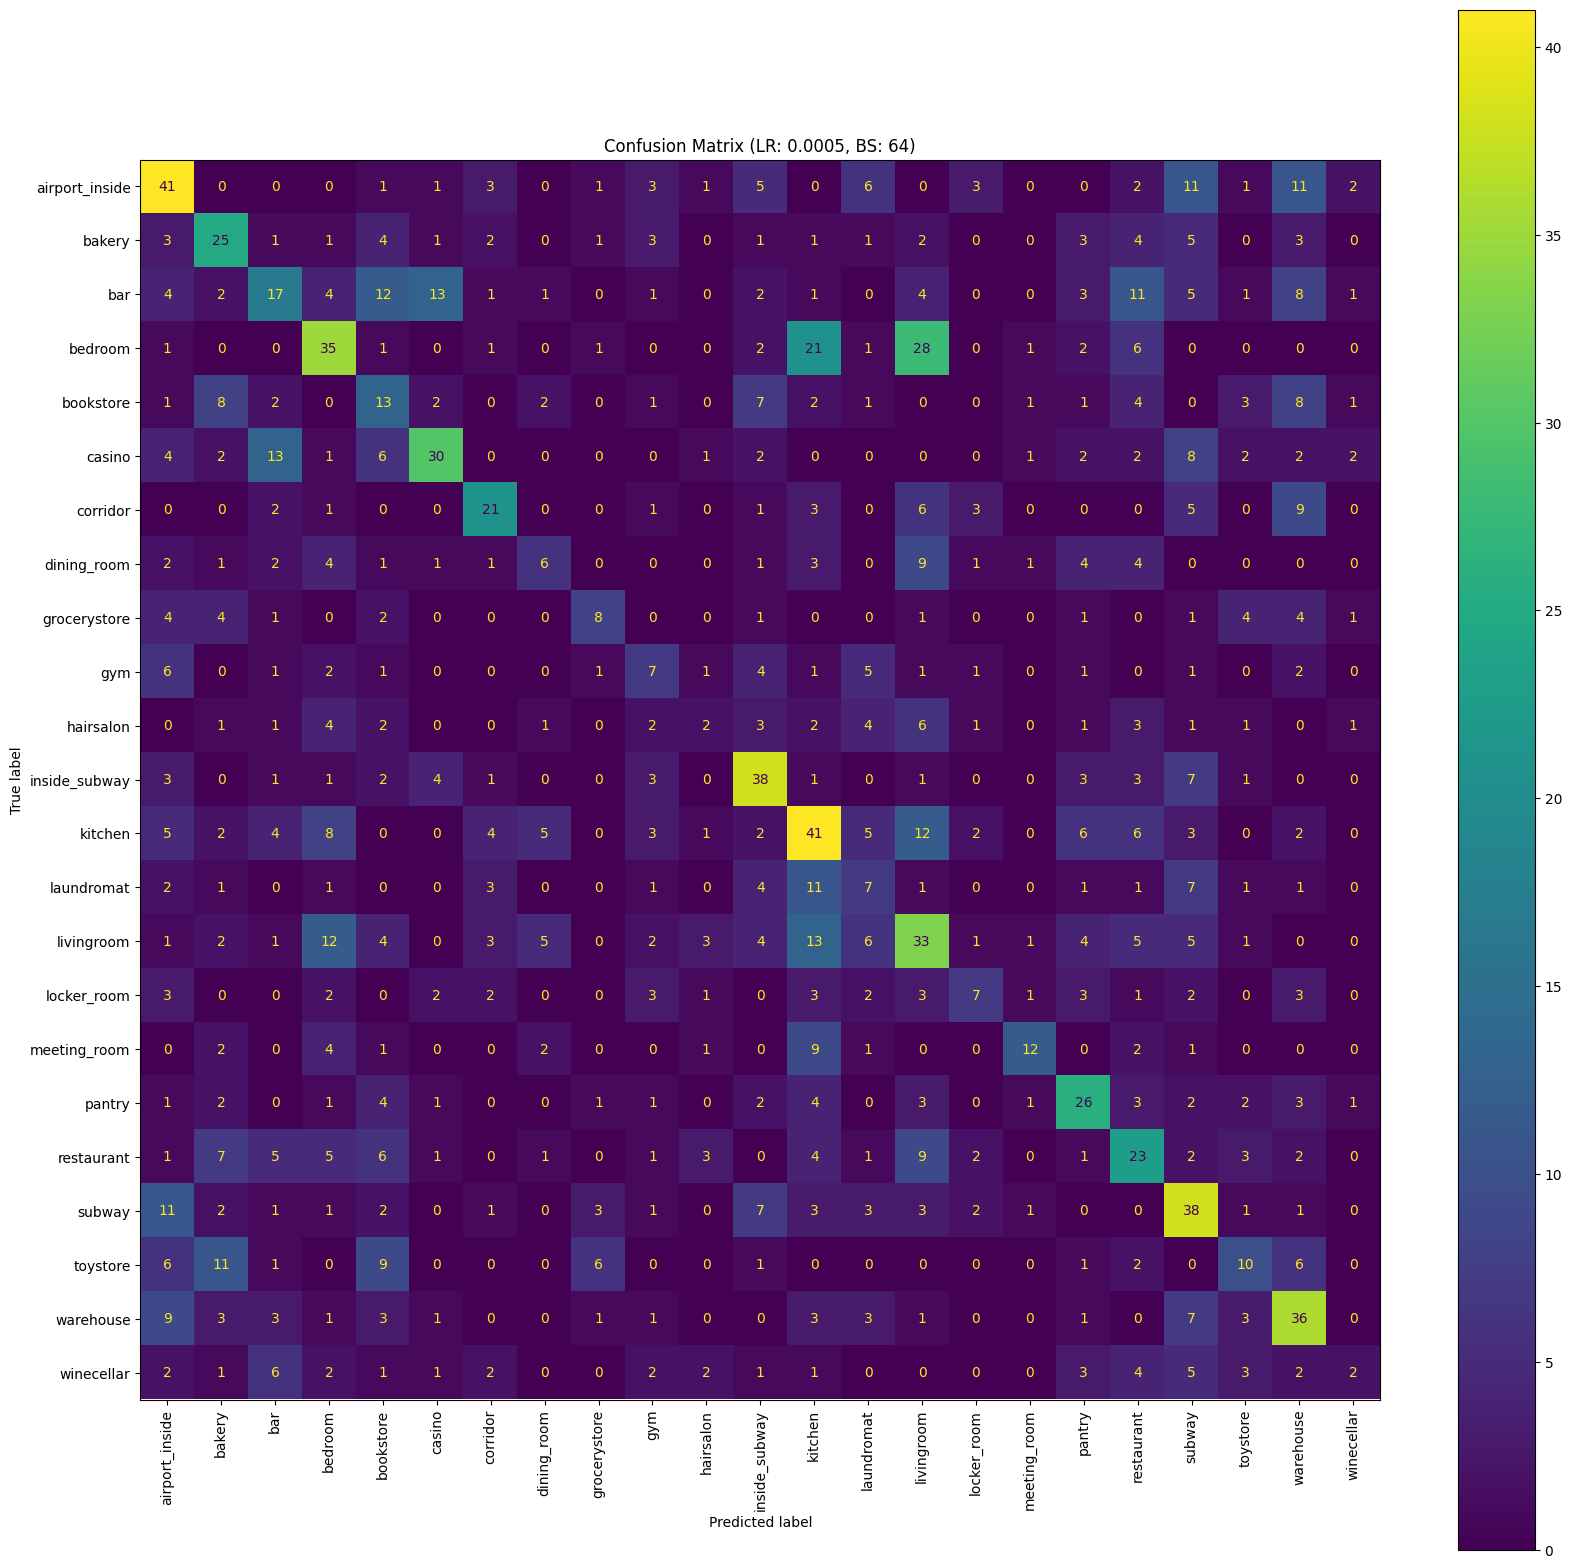

Case-> Learning Rate: 0.0005, Batch Size: 64, Dropout: 0.5
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 29s 262ms/step - accuracy: 0.0839 - loss: 3.0590 - val_accuracy: 0.1672 - val_loss: 2.7311
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 255ms/step - accuracy: 0.1535 - loss: 2.8012 - val_accuracy: 0.2078 - val_loss: 2.6142
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.2082 - loss: 2.6262 - val_accuracy: 0.2319 - val_loss: 2.5635
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 252ms/step - accuracy: 0.2520 - loss: 2.4669 - val_accuracy: 0.2608 - val_loss: 2.4088
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.2970 - loss: 2.3148 - val_accuracy: 0.3008 - val_loss: 2.3603
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 252ms/step - accuracy: 0.3296 - loss: 2.1634 - val_accuracy: 0.3111 - val_loss: 2.2820
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 29s 273ms/step - accuracy: 0.3669 - loss: 1.9962 - val_accuracy: 0.3187 - val_loss: 2.2458
Epoch 8/25
106/106 ━━━━━

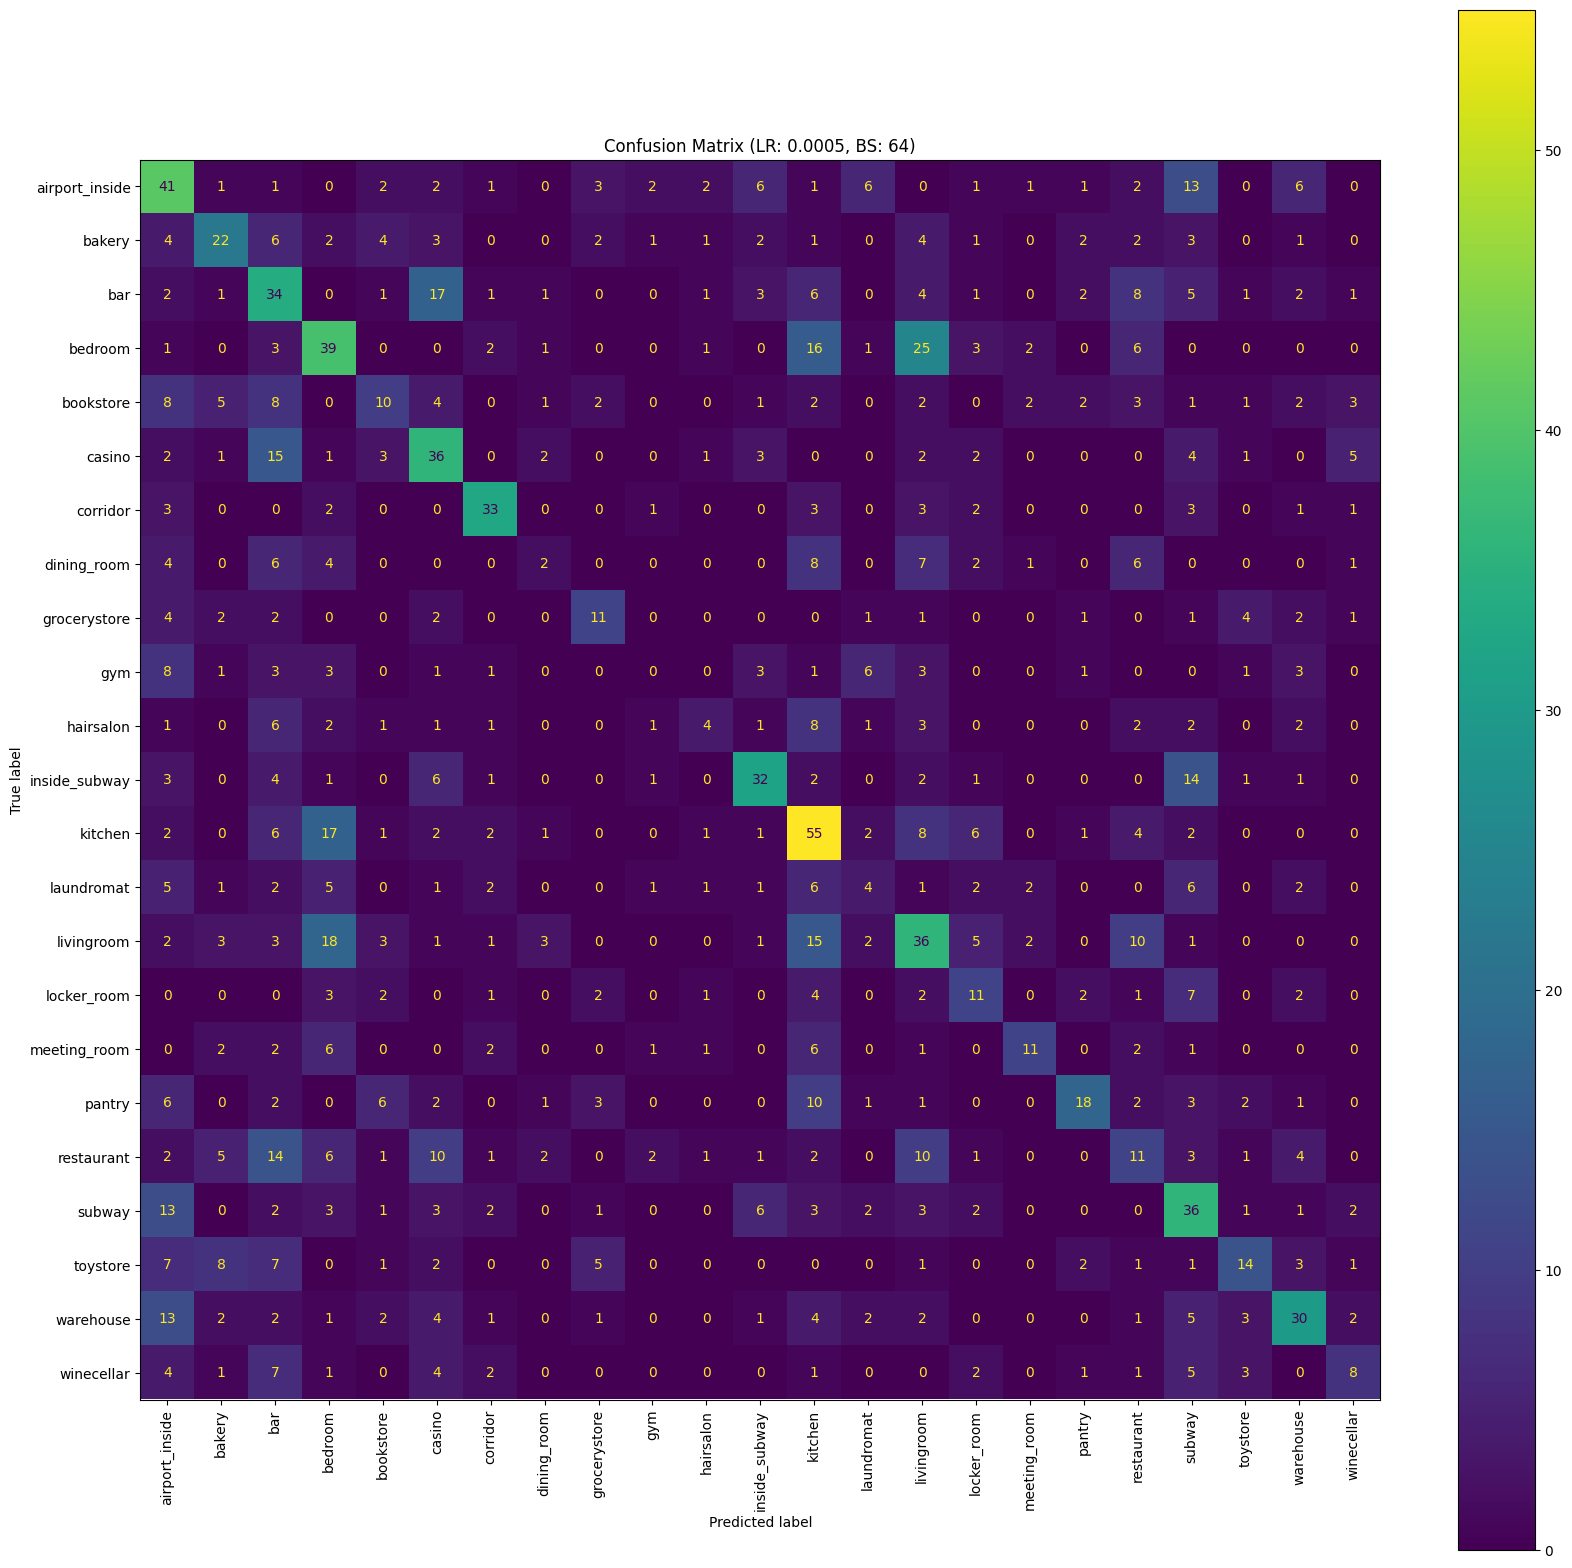

Case-> Learning Rate: 0.0005, Batch Size: 64, Dropout: 0.8
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.0654 - loss: 3.1705 - val_accuracy: 0.1294 - val_loss: 3.0173
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 29s 273ms/step - accuracy: 0.0882 - loss: 3.0588 - val_accuracy: 0.1266 - val_loss: 2.9861
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 262ms/step - accuracy: 0.1031 - loss: 2.9934 - val_accuracy: 0.1514 - val_loss: 2.8573
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.1212 - loss: 2.9492 - val_accuracy: 0.1700 - val_loss: 2.7392
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.1233 - loss: 2.8947 - val_accuracy: 0.1982 - val_loss: 2.7446
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.1369 - loss: 2.8275 - val_accuracy: 0.1879 - val_loss: 2.6862
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 254ms/step - accuracy: 0.1496 - loss: 2.7804 - val_accuracy: 0.2113 - val_loss: 2.7252
Epoch 8/25
106/106 ━━━━━

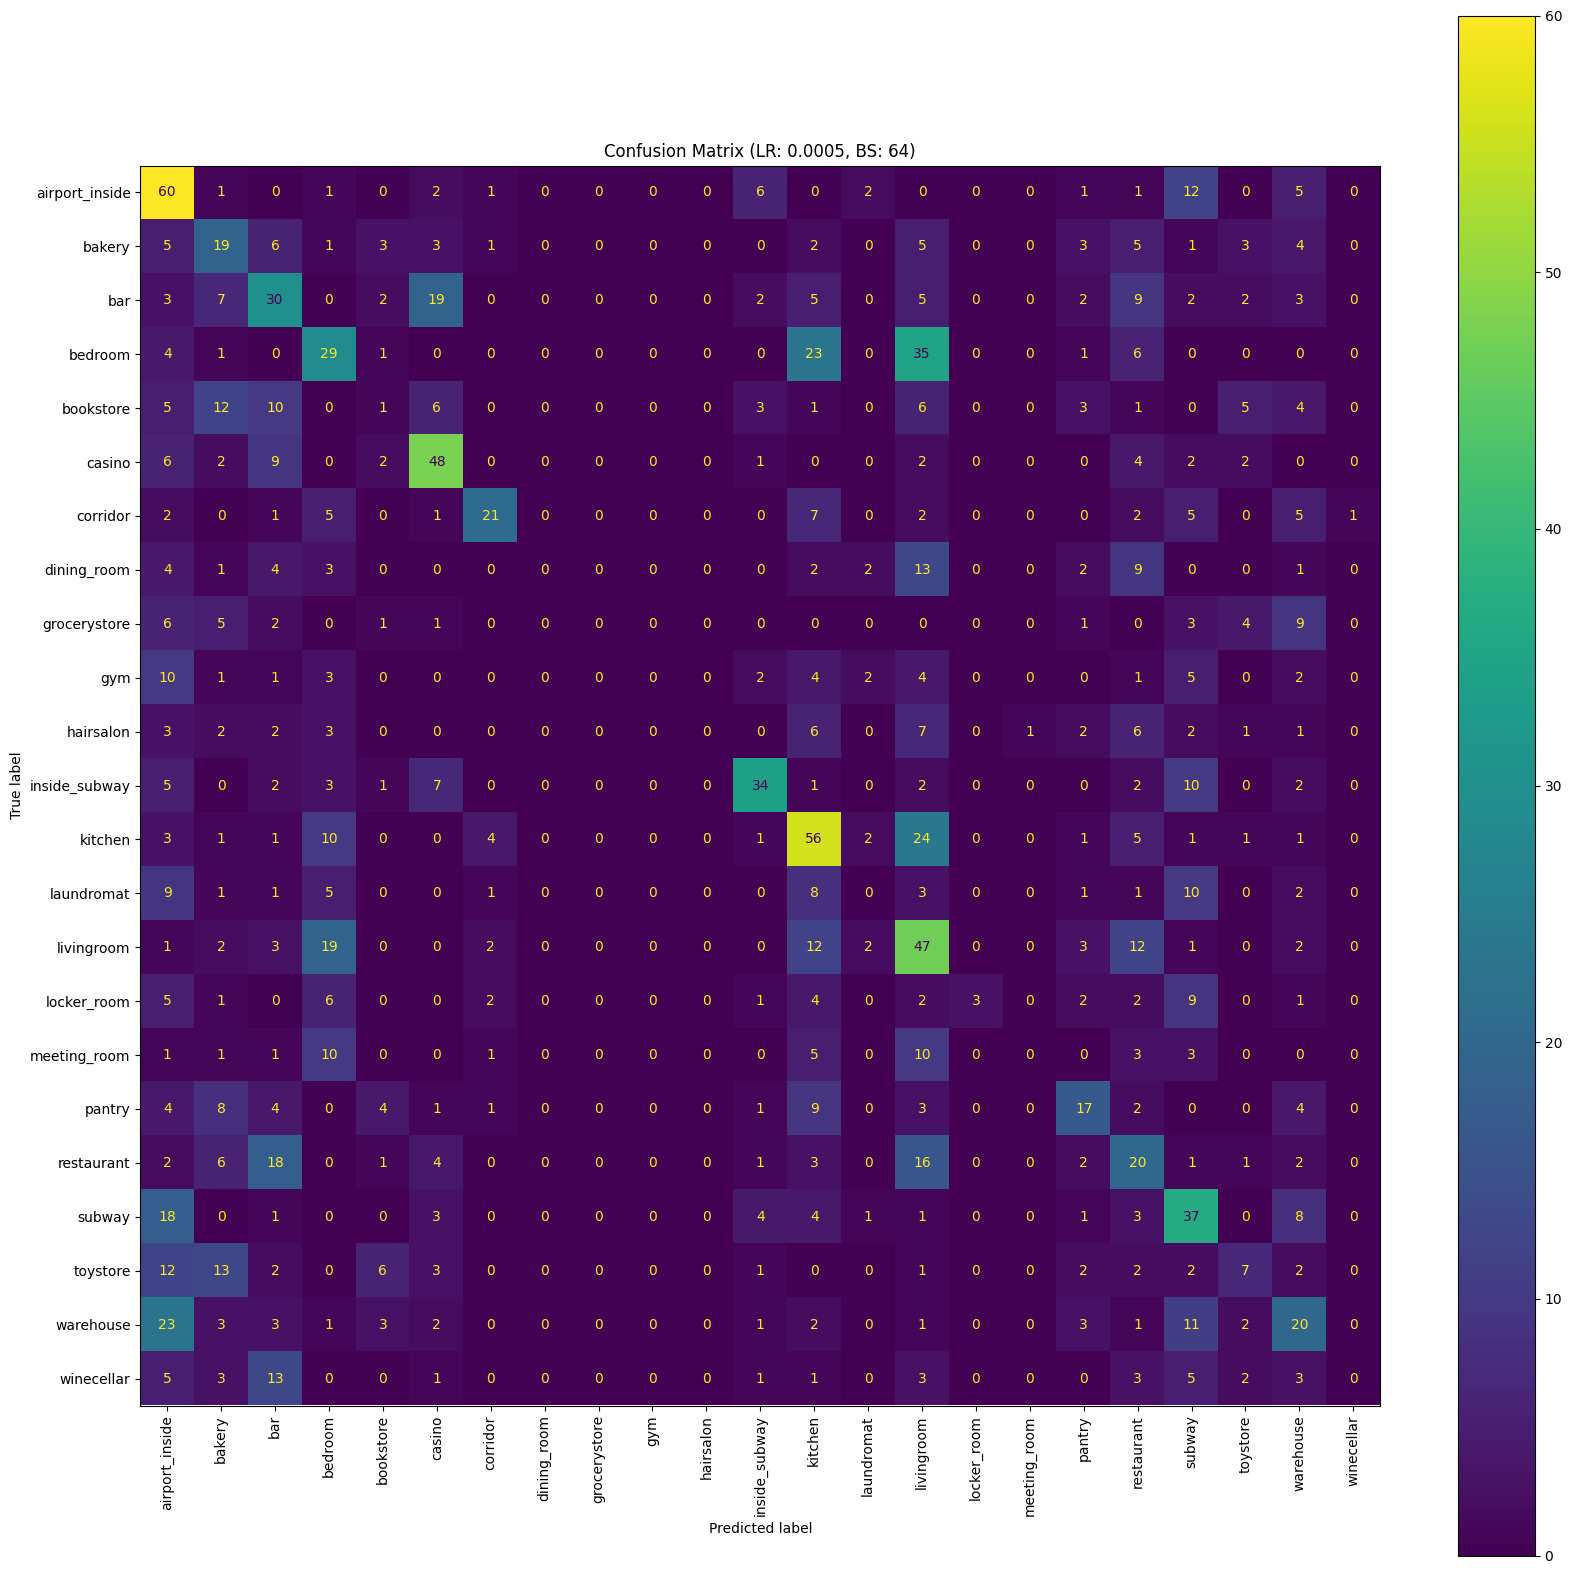

Case-> Learning Rate: 0.0001, Batch Size: 32, Dropout: 0.3
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.0763 - loss: 3.0760 - val_accuracy: 0.1672 - val_loss: 2.8344
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.1546 - loss: 2.8439 - val_accuracy: 0.1927 - val_loss: 2.6899
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.1858 - loss: 2.6882 - val_accuracy: 0.2134 - val_loss: 2.5685
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.2060 - loss: 2.5880 - val_accuracy: 0.2264 - val_loss: 2.5493
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.2470 - loss: 2.4884 - val_accuracy: 0.2278 - val_loss: 2.4664
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - accuracy: 0.2608 - loss: 2.4291 - val_accuracy: 0.2581 - val_loss: 2.4058
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 140ms/step - accuracy: 0.2848 - loss: 2.3299 - val_accuracy: 0.2691 - val_loss: 2.3739
Epoch 8/25
212/212 ━━━━━

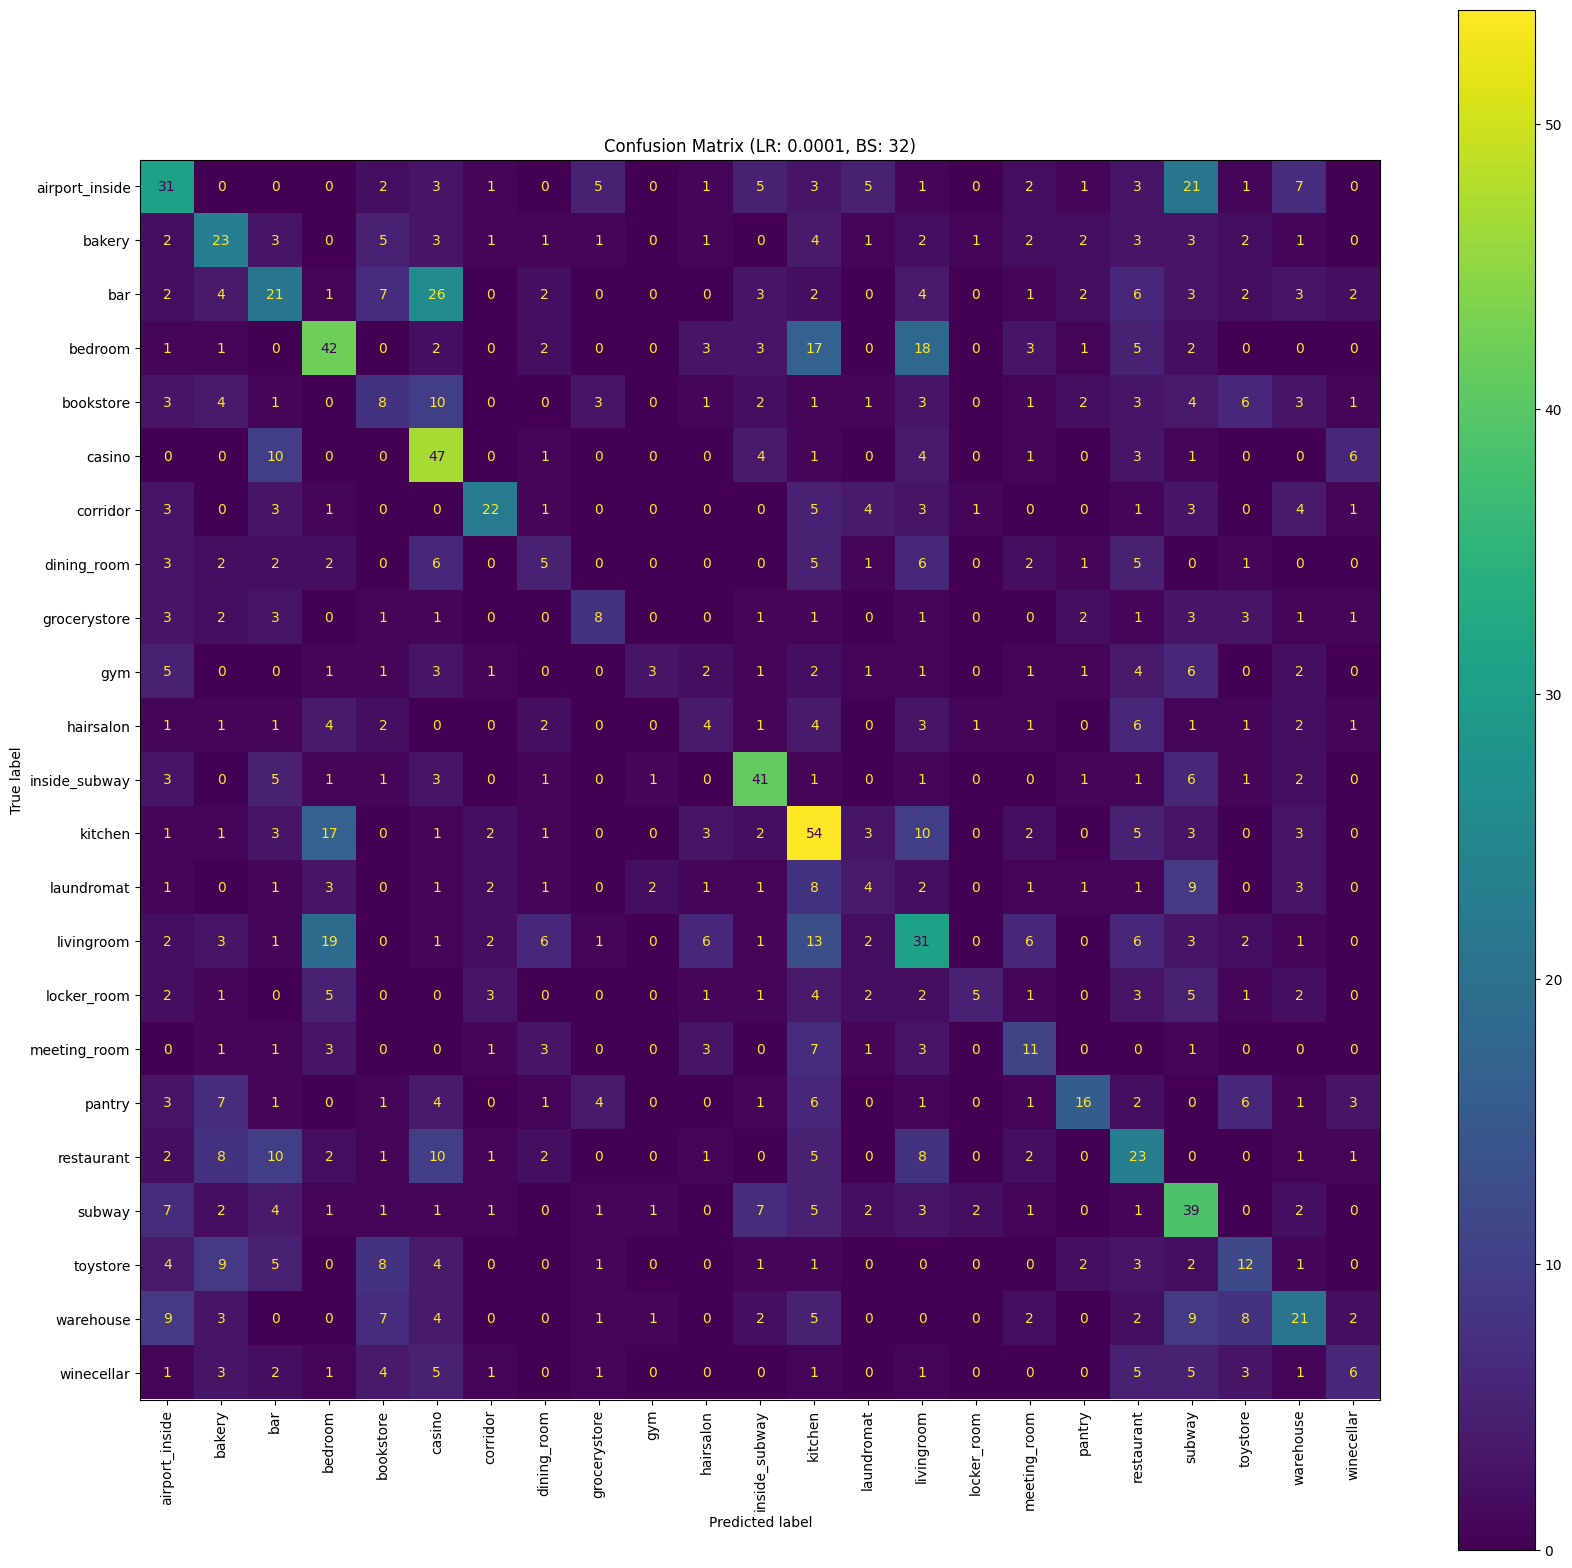

Case-> Learning Rate: 0.0001, Batch Size: 32, Dropout: 0.5
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.0760 - loss: 3.0809 - val_accuracy: 0.1638 - val_loss: 2.8526
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - accuracy: 0.1378 - loss: 2.9038 - val_accuracy: 0.1886 - val_loss: 2.7478
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 143ms/step - accuracy: 0.1576 - loss: 2.8006 - val_accuracy: 0.1700 - val_loss: 2.6851
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 143ms/step - accuracy: 0.1808 - loss: 2.7046 - val_accuracy: 0.2092 - val_loss: 2.5923
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.2020 - loss: 2.6681 - val_accuracy: 0.2443 - val_loss: 2.5331
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.2189 - loss: 2.5763 - val_accuracy: 0.2416 - val_loss: 2.4898
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - accuracy: 0.2281 - loss: 2.5368 - val_accuracy: 0.2374 - val_loss: 2.4565
Epoch 8/25
212/212 ━━━━━

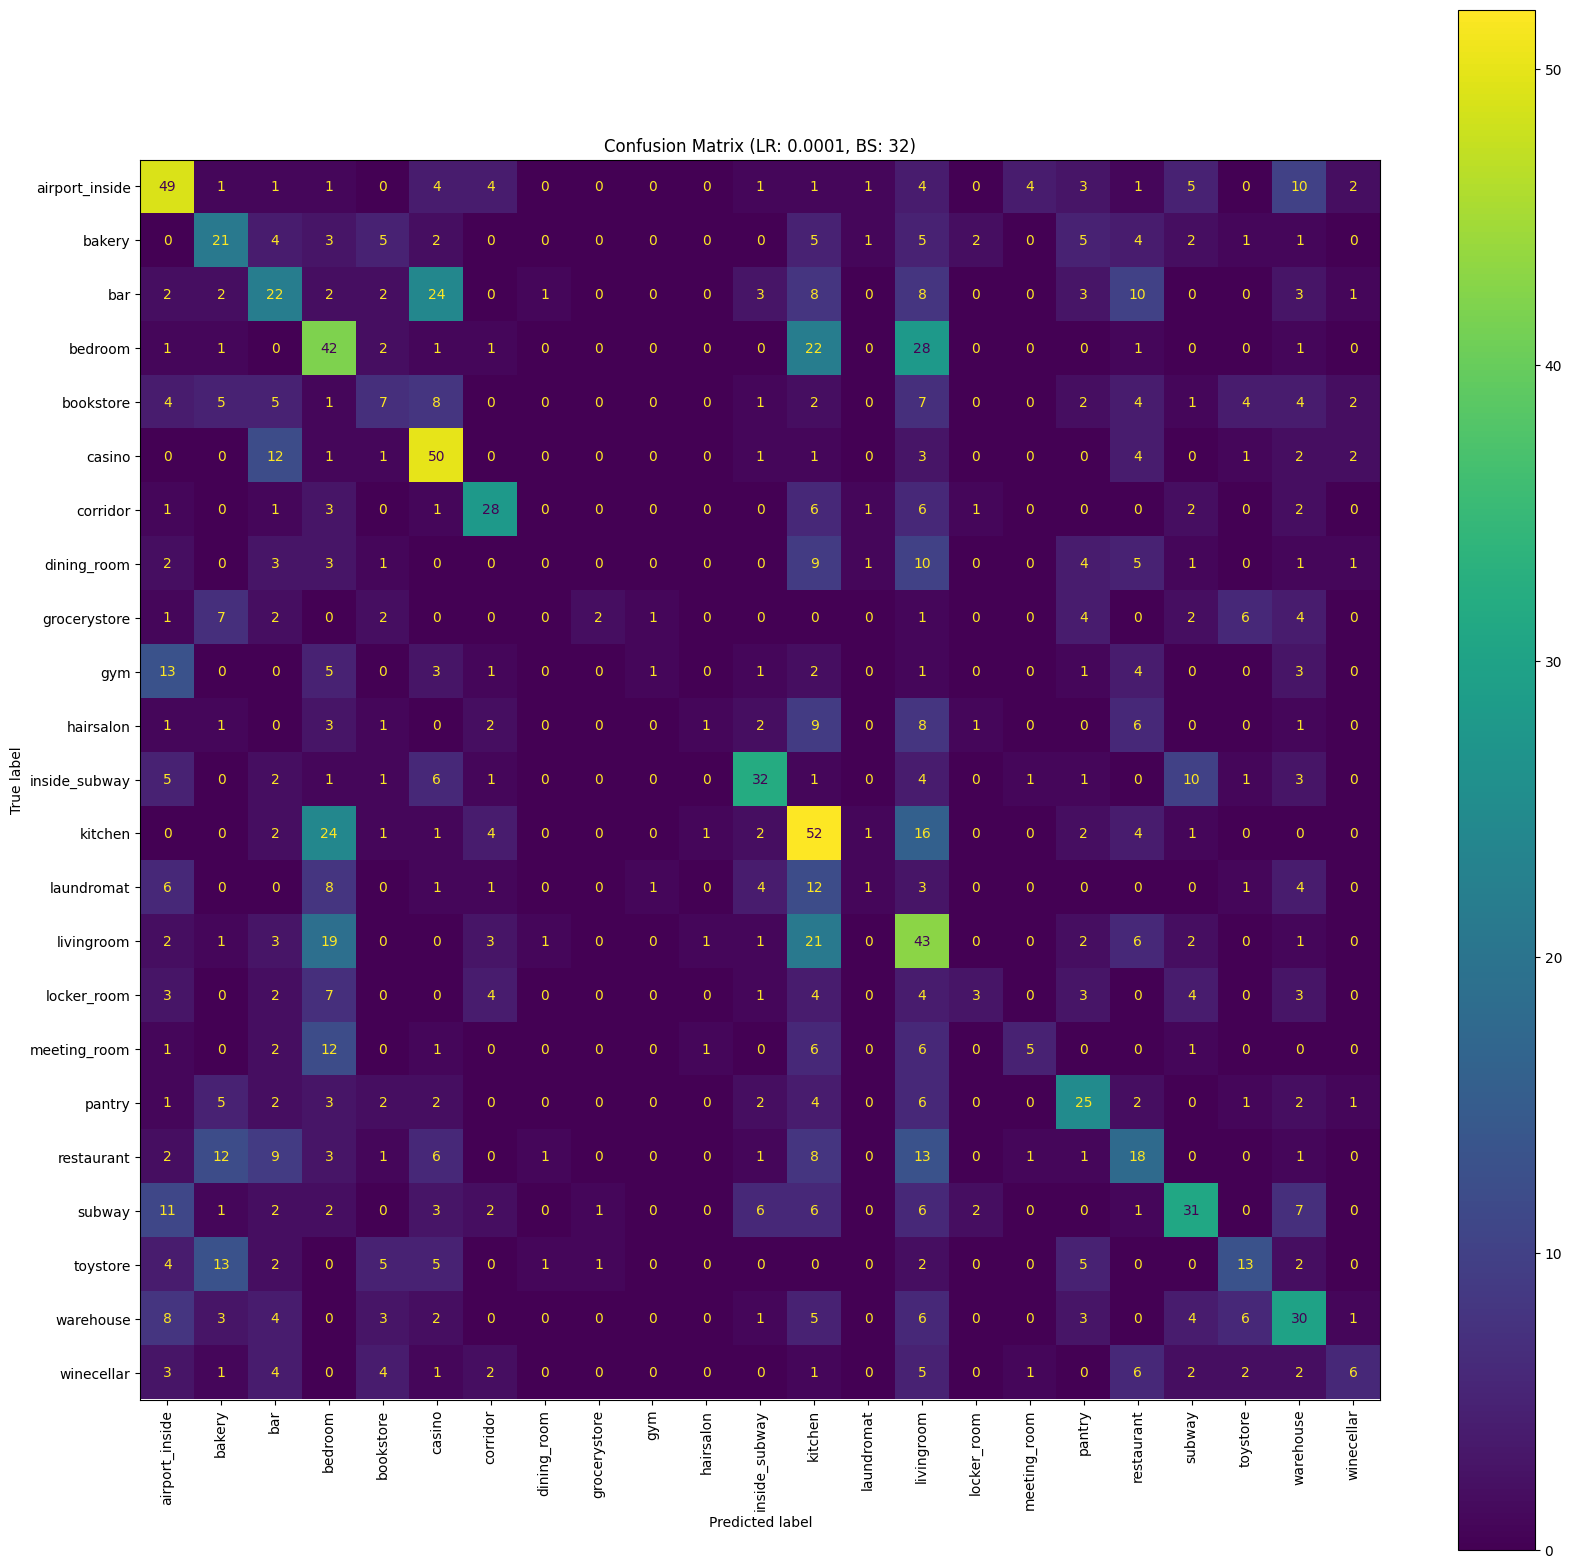

Case-> Learning Rate: 0.0001, Batch Size: 32, Dropout: 0.8
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 0.0584 - loss: 3.1172 - val_accuracy: 0.0957 - val_loss: 3.0167
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 32s 150ms/step - accuracy: 0.0943 - loss: 3.0340 - val_accuracy: 0.1466 - val_loss: 2.9266
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 145ms/step - accuracy: 0.1043 - loss: 2.9917 - val_accuracy: 0.1487 - val_loss: 2.8620
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - accuracy: 0.1228 - loss: 2.9345 - val_accuracy: 0.1672 - val_loss: 2.8768
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 140ms/step - accuracy: 0.1236 - loss: 2.9178 - val_accuracy: 0.1906 - val_loss: 2.7777
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.1297 - loss: 2.8832 - val_accuracy: 0.1975 - val_loss: 2.7559
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 32s 152ms/step - accuracy: 0.1451 - loss: 2.8451 - val_accuracy: 0.2154 - val_loss: 2.7113
Epoch 8/25
212/212 ━━━━━

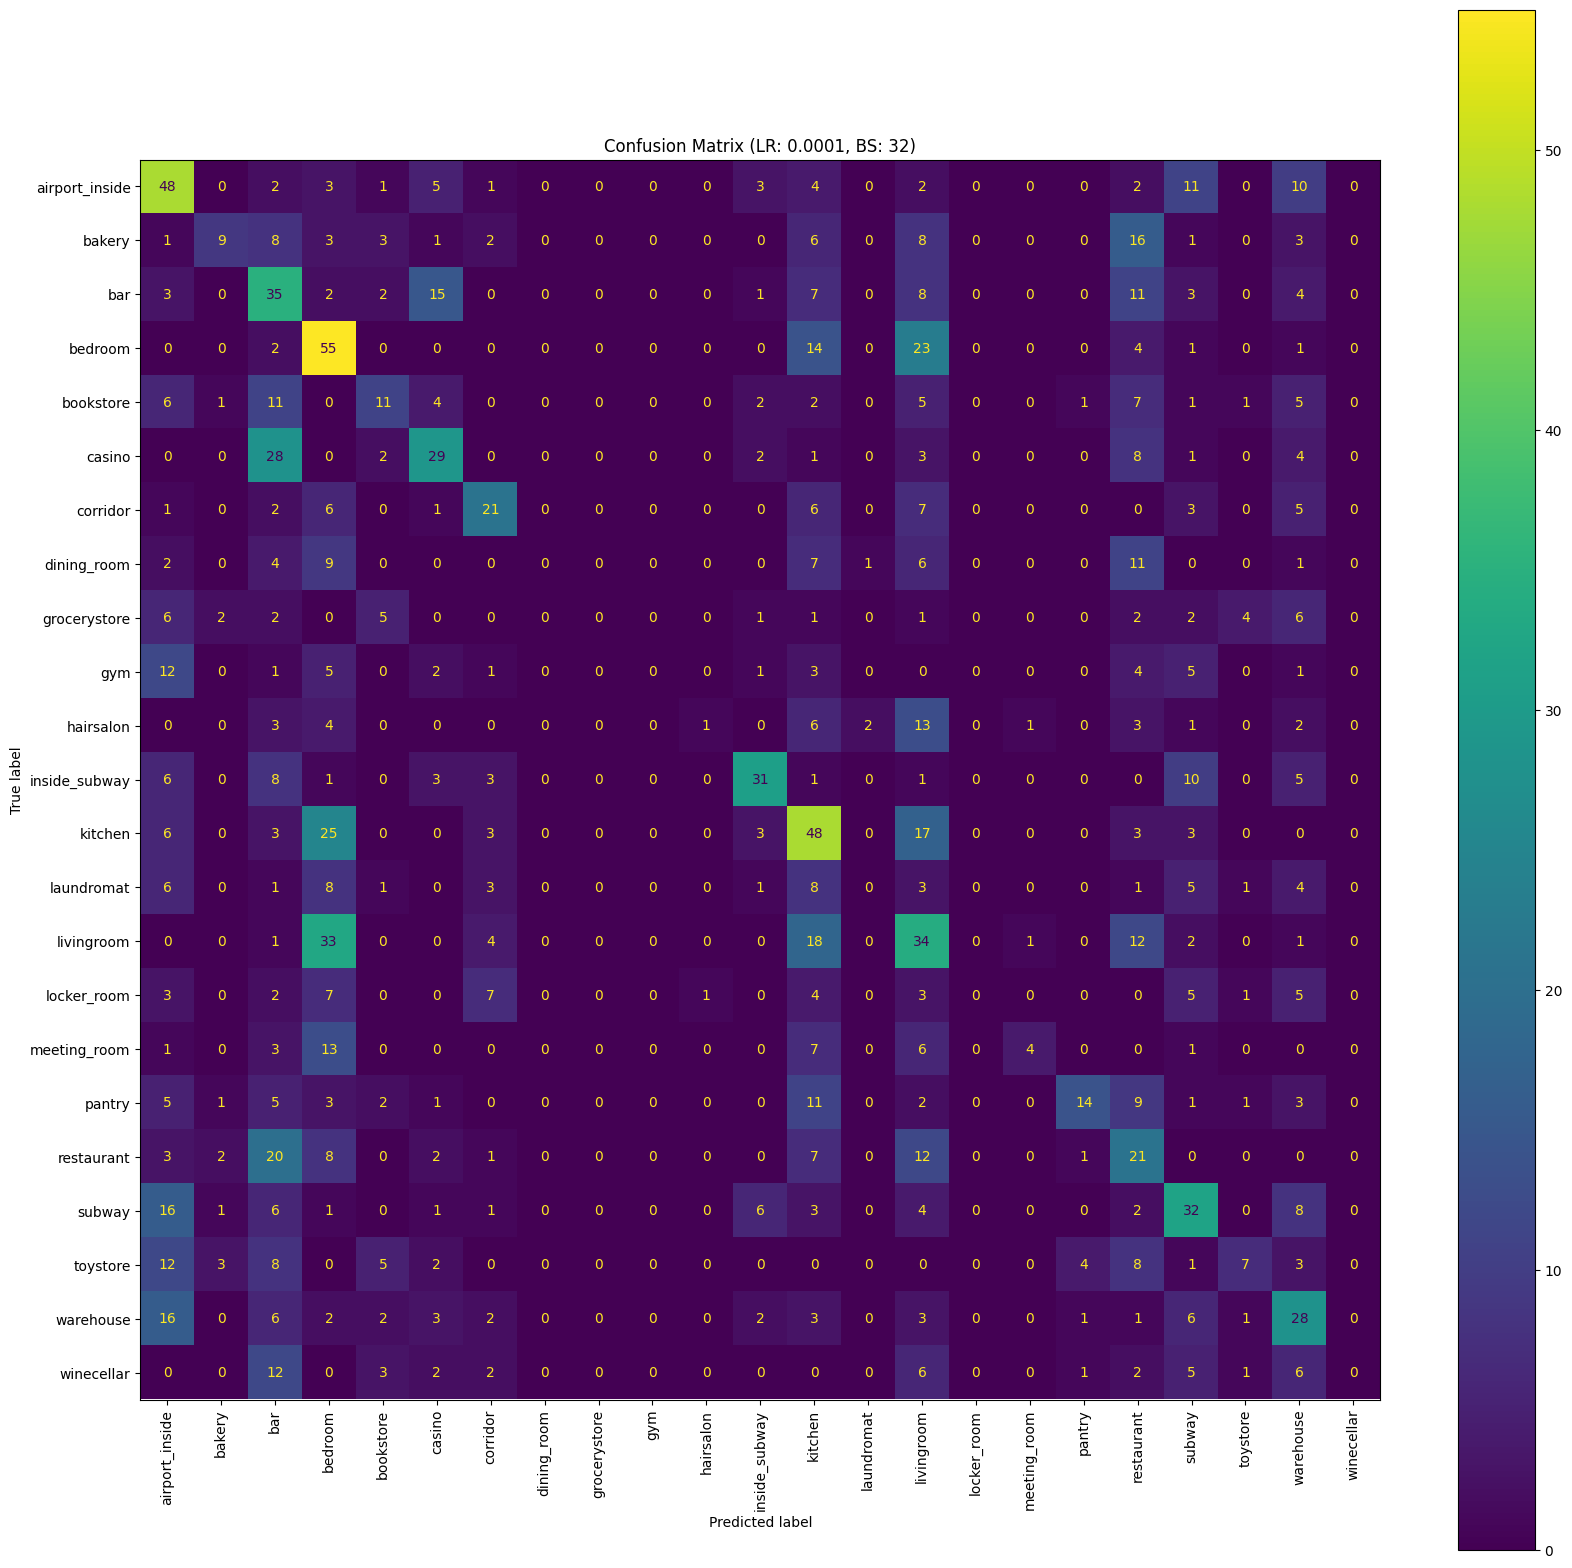

Case-> Learning Rate: 0.0001, Batch Size: 64, Dropout: 0.3
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 33s 291ms/step - accuracy: 0.0881 - loss: 3.0726 - val_accuracy: 0.1521 - val_loss: 2.8609
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - accuracy: 0.1531 - loss: 2.8342 - val_accuracy: 0.1734 - val_loss: 2.7030
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.1881 - loss: 2.6961 - val_accuracy: 0.2106 - val_loss: 2.6045
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.2107 - loss: 2.5935 - val_accuracy: 0.2326 - val_loss: 2.5455
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.2458 - loss: 2.5123 - val_accuracy: 0.2333 - val_loss: 2.5161
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 256ms/step - accuracy: 0.2500 - loss: 2.4498 - val_accuracy: 0.2498 - val_loss: 2.4456
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 30s 285ms/step - accuracy: 0.2780 - loss: 2.3719 - val_accuracy: 0.2581 - val_loss: 2.4013
Epoch 8/25
106/106 ━━━━━

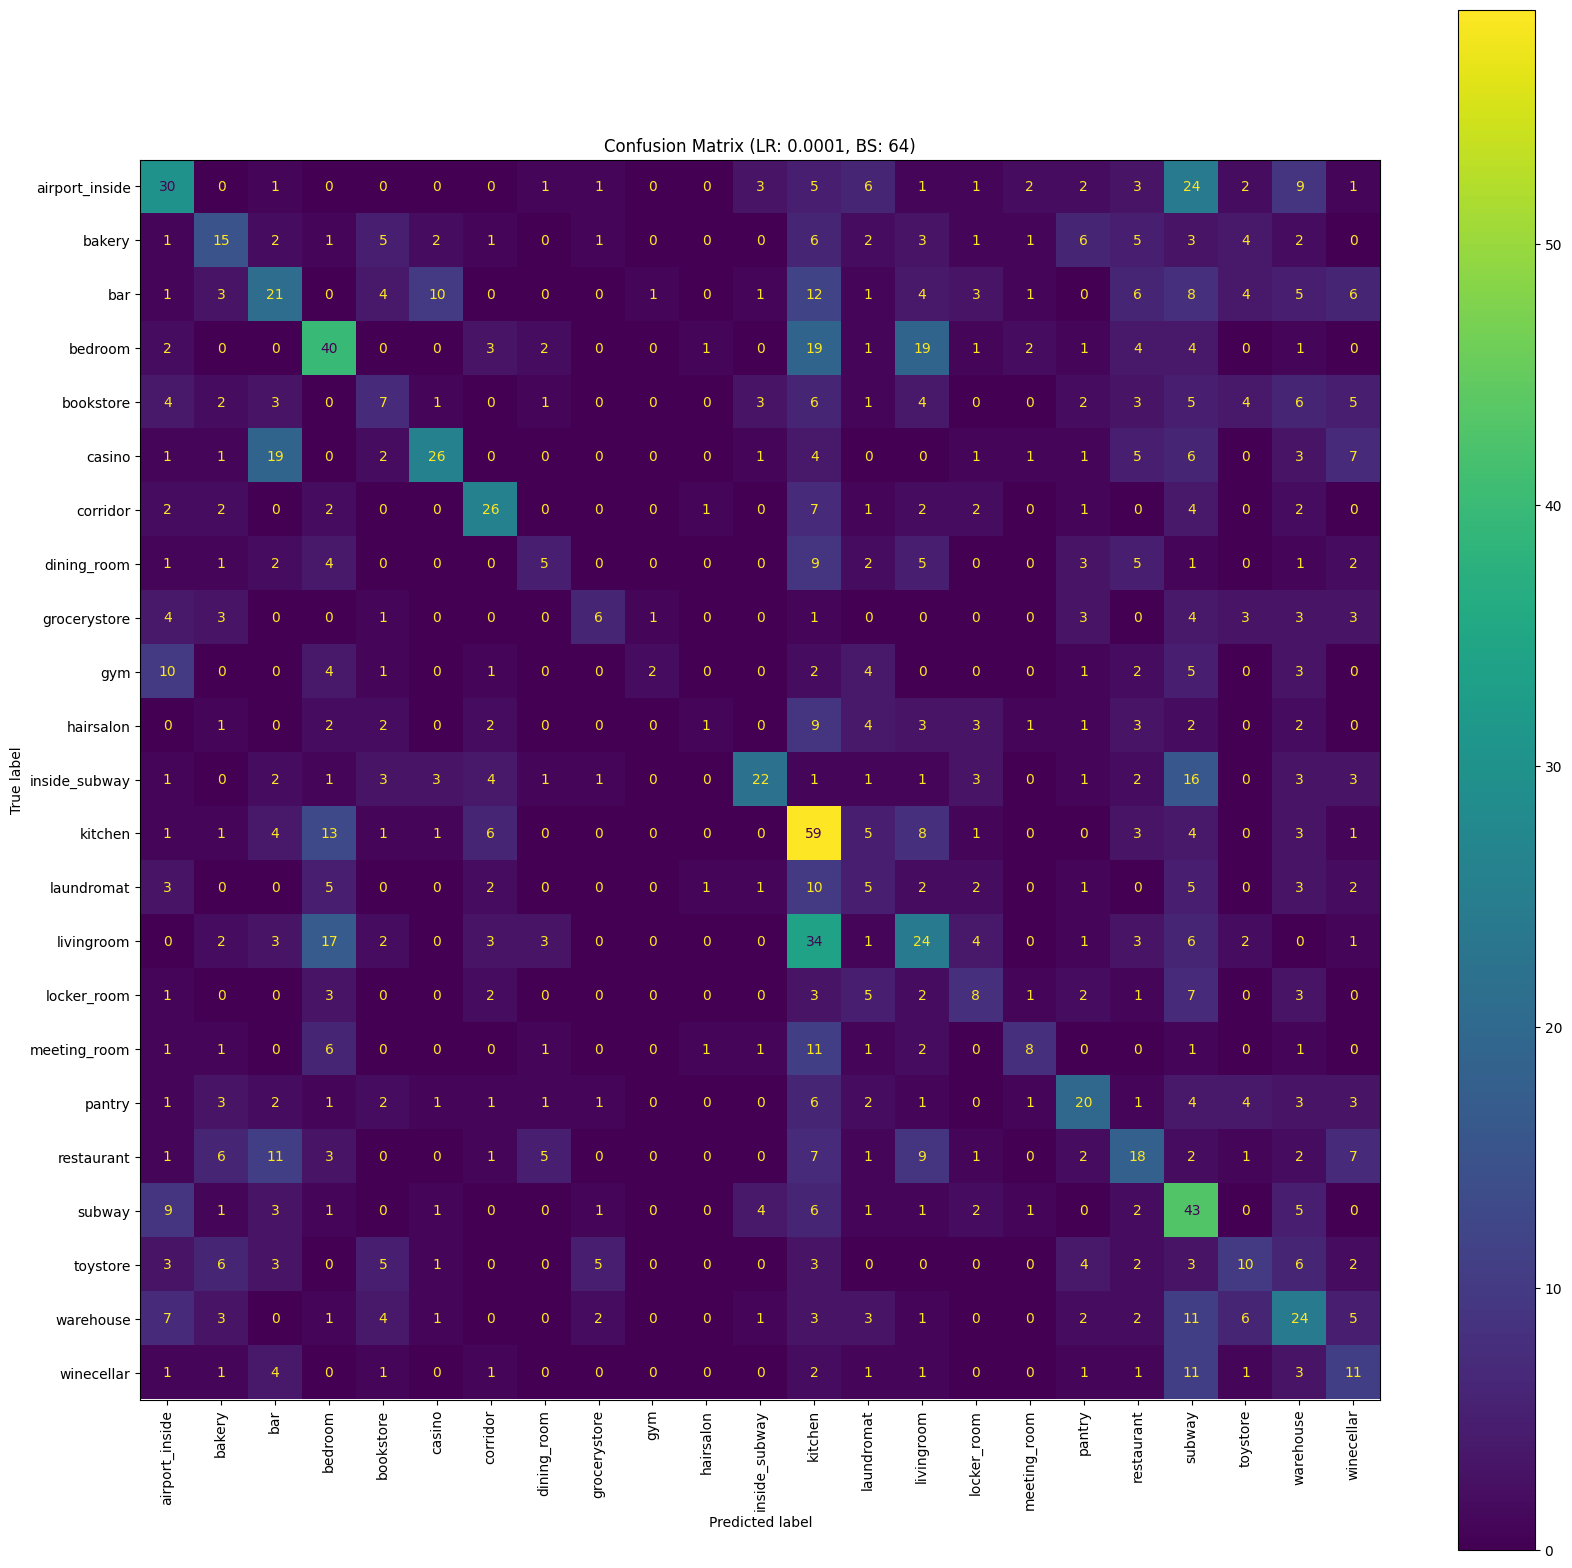

Case-> Learning Rate: 0.0001, Batch Size: 64, Dropout: 0.5
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 32s 283ms/step - accuracy: 0.0700 - loss: 3.0989 - val_accuracy: 0.1342 - val_loss: 2.8914
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.1371 - loss: 2.9265 - val_accuracy: 0.1769 - val_loss: 2.7972
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 256ms/step - accuracy: 0.1555 - loss: 2.8396 - val_accuracy: 0.1893 - val_loss: 2.7276
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 30s 278ms/step - accuracy: 0.1588 - loss: 2.7971 - val_accuracy: 0.2051 - val_loss: 2.6706
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - accuracy: 0.1882 - loss: 2.6819 - val_accuracy: 0.2085 - val_loss: 2.6152
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 257ms/step - accuracy: 0.2032 - loss: 2.6453 - val_accuracy: 0.2168 - val_loss: 2.5726
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 29s 271ms/step - accuracy: 0.2170 - loss: 2.5918 - val_accuracy: 0.2251 - val_loss: 2.5292
Epoch 8/25
106/106 ━━━━━

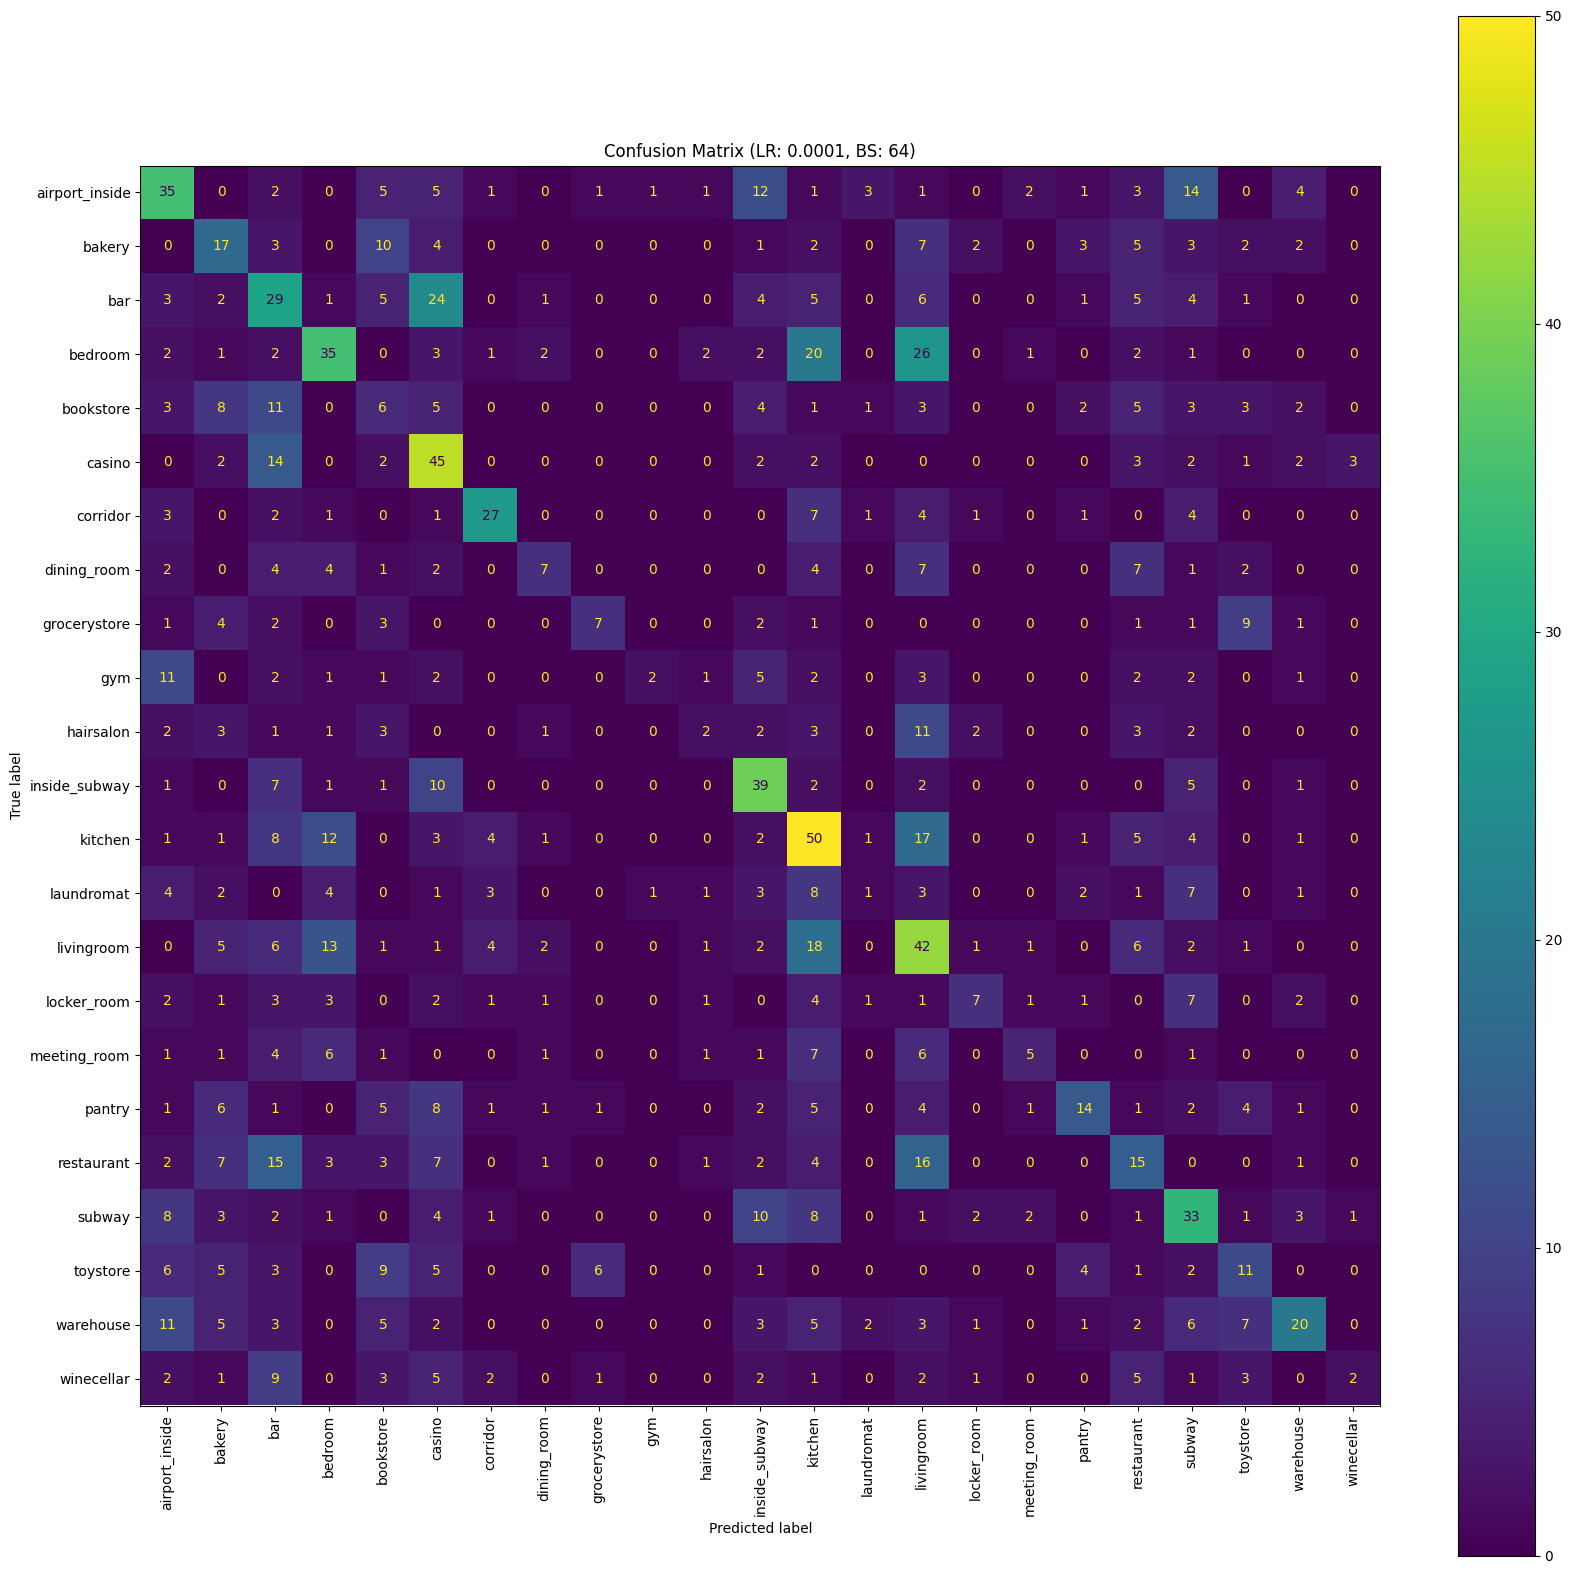

Case-> Learning Rate: 0.0001, Batch Size: 64, Dropout: 0.8
Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 31s 275ms/step - accuracy: 0.0562 - loss: 3.1294 - val_accuracy: 0.1122 - val_loss: 3.0685
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.0886 - loss: 3.0762 - val_accuracy: 0.1067 - val_loss: 2.9831
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 265ms/step - accuracy: 0.0896 - loss: 3.0388 - val_accuracy: 0.1349 - val_loss: 2.9361
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.1097 - loss: 2.9948 - val_accuracy: 0.1259 - val_loss: 2.9027
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 261ms/step - accuracy: 0.1155 - loss: 2.9751 - val_accuracy: 0.1466 - val_loss: 2.8770
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.1275 - loss: 2.9419 - val_accuracy: 0.1528 - val_loss: 2.8405
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 266ms/step - accuracy: 0.1313 - loss: 2.9215 - val_accuracy: 0.1796 - val_loss: 2.7989
Epoch 8/25
106/106 ━━━━━

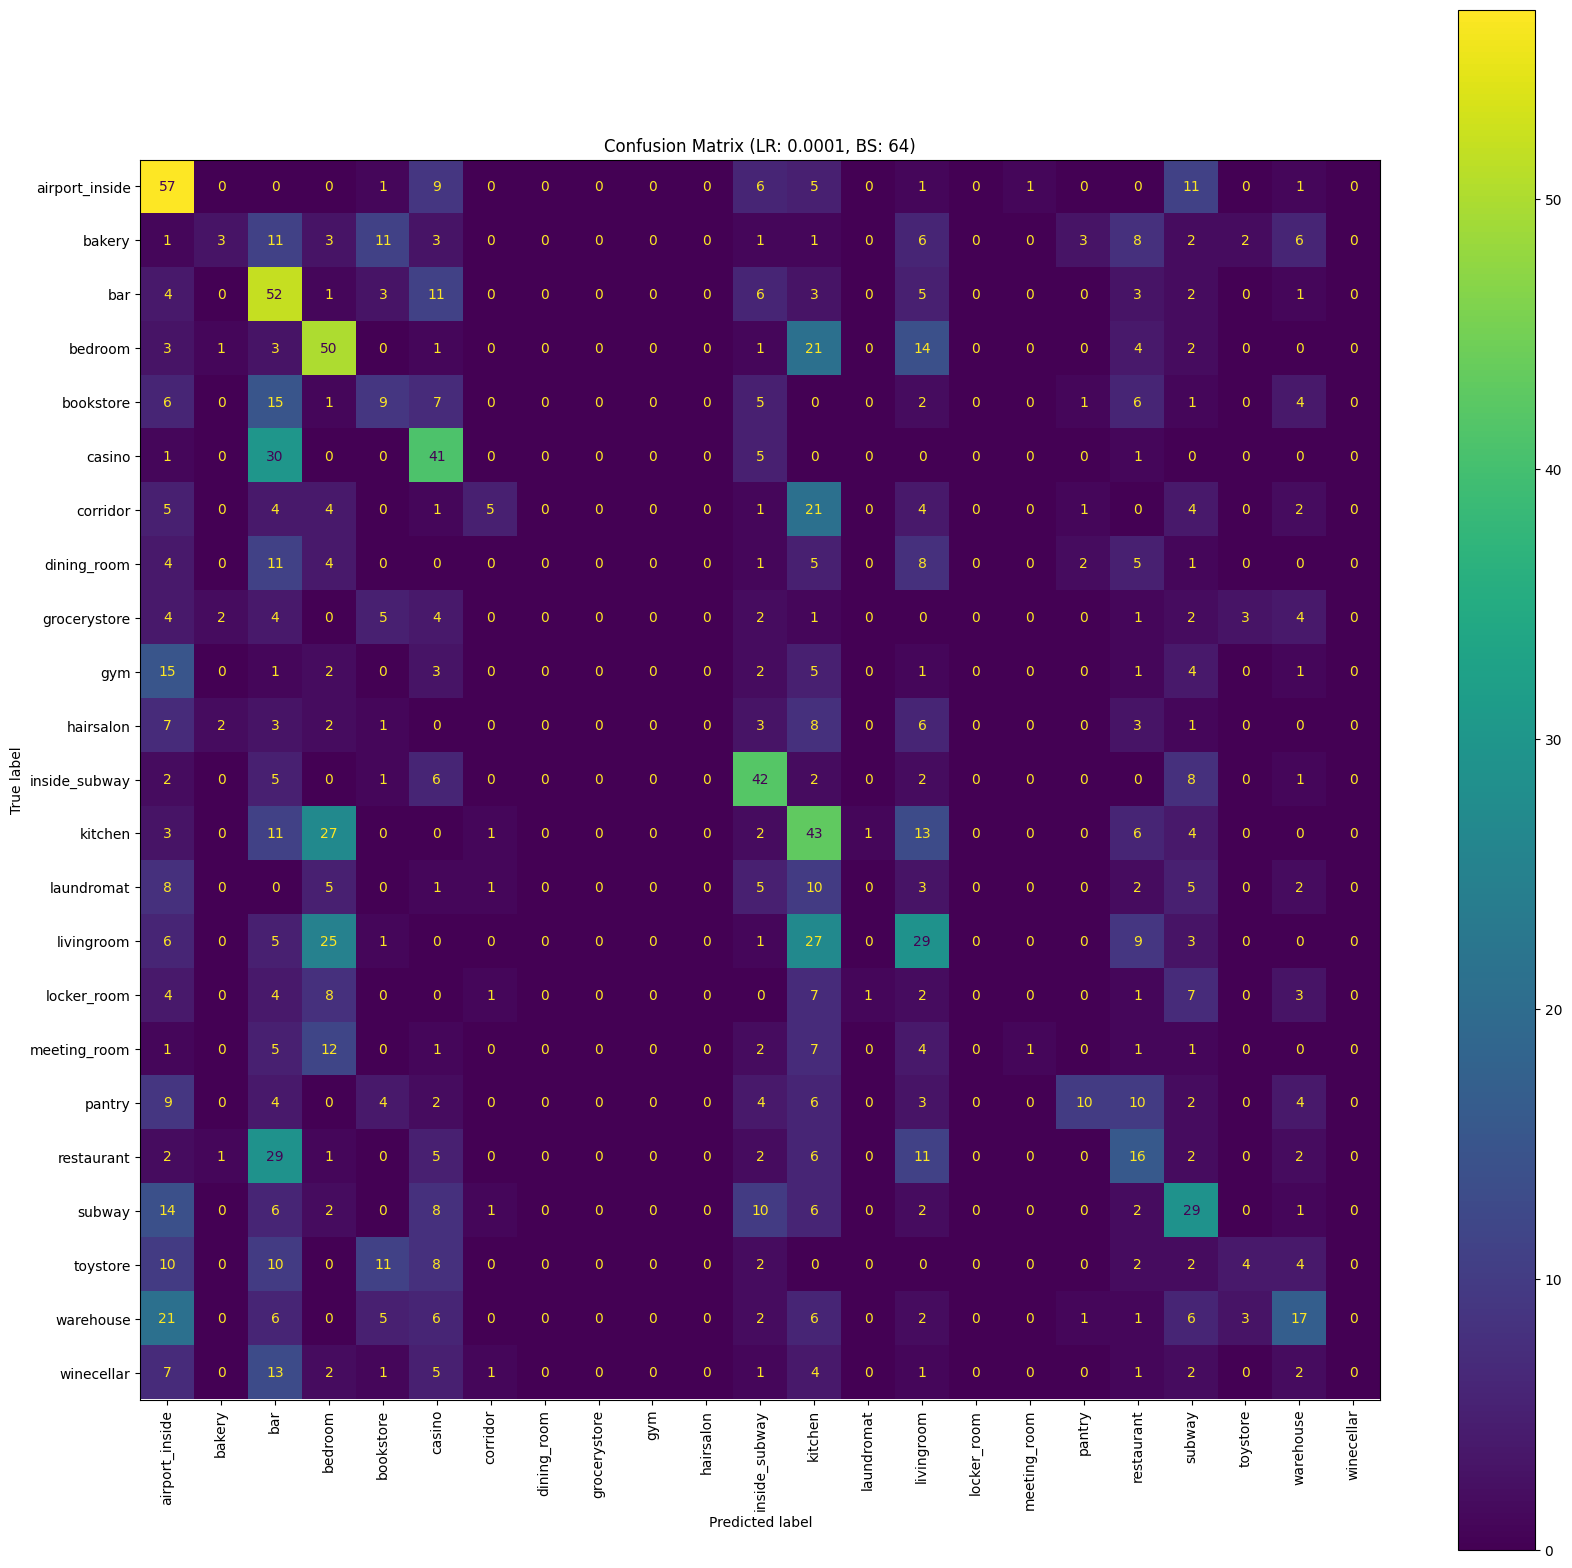

In [17]:
import matplotlib.pyplot as plt
for lr in learning_rates:
    for batch_size in batch_sizes:
        for dropout in dropout_values:
            print(f"Case-> Learning Rate: {lr}, Batch Size: {batch_size}, Dropout: {dropout}")
            model = Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(128, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(dropout))  # Sabit dropout 0.5
            model.add(Dense(len(classes), activation='softmax'))   
            model.compile(optimizer=Adam(learning_rate=lr), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])
            history=model.fit(
                x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=25,
                batch_size=batch_size,
                verbose=1
            )
            test_loss, test_acc=model.evaluate(x_test, y_test, verbose=0)
            results.append({
                'lr': lr,
                'batch_size': batch_size,
                'history': history,
                'test_acc': test_acc,
                'test_loss': test_loss,
                'dropout': dropout
            })
            y_pred=model.predict(x_test)
            y_pred_classes=np.argmax(y_pred, axis=1)
            cm=confusion_matrix(y_test, y_pred_classes)
            fig, ax=plt.subplots(figsize=(20, 20))
            disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
            #disp.plot(cmap='viridis')
            disp.plot(cmap='viridis', ax=ax, xticks_rotation='vertical')
            plt.title(f"Confusion Matrix (LR: {lr}, BS: {batch_size})")
            plt.show()

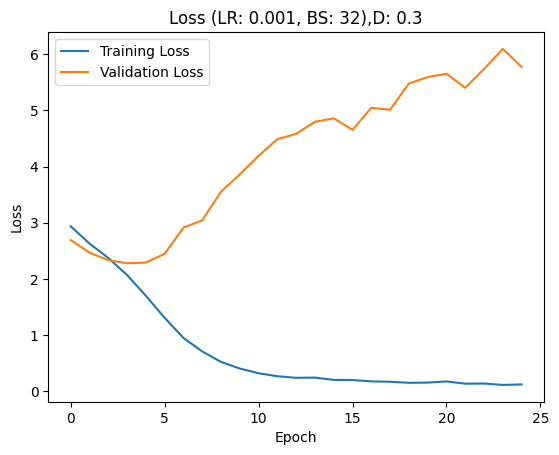

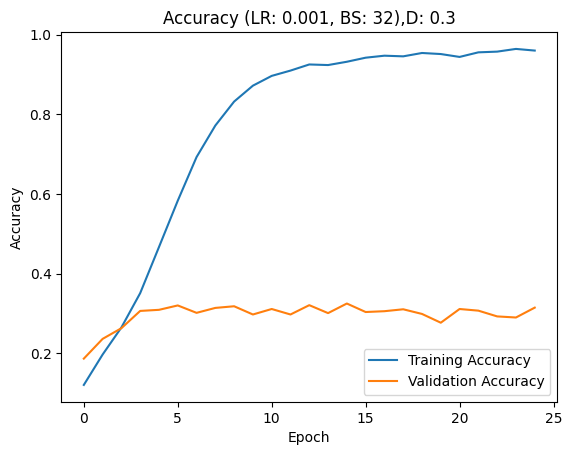

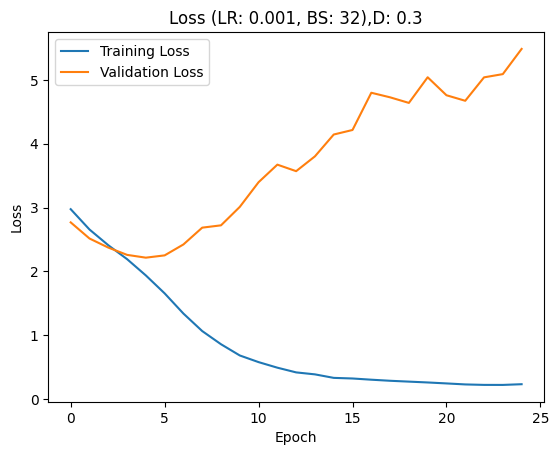

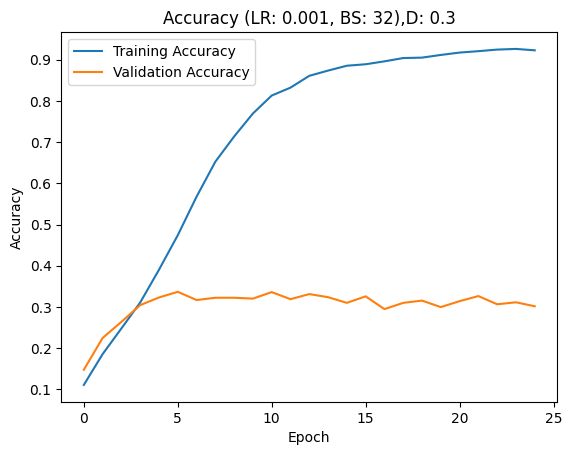

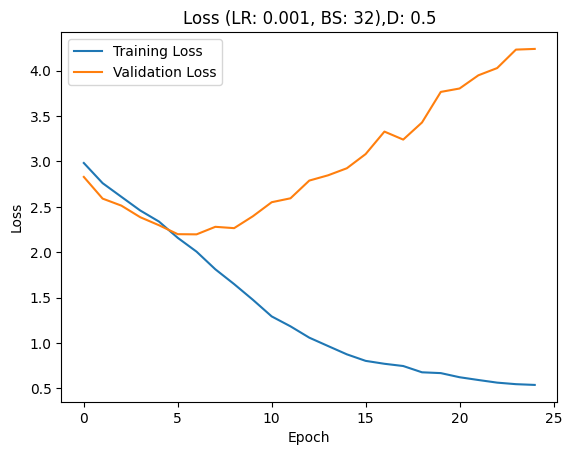

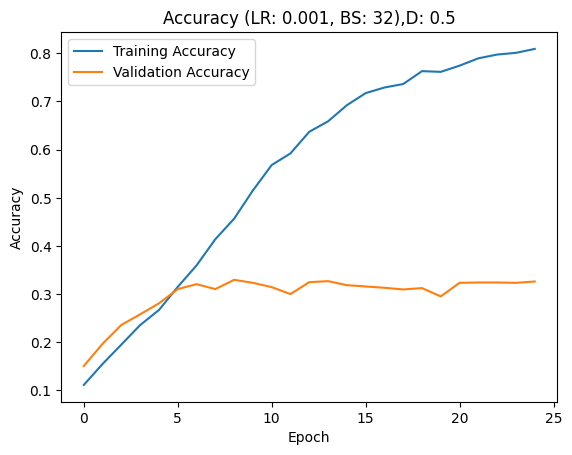

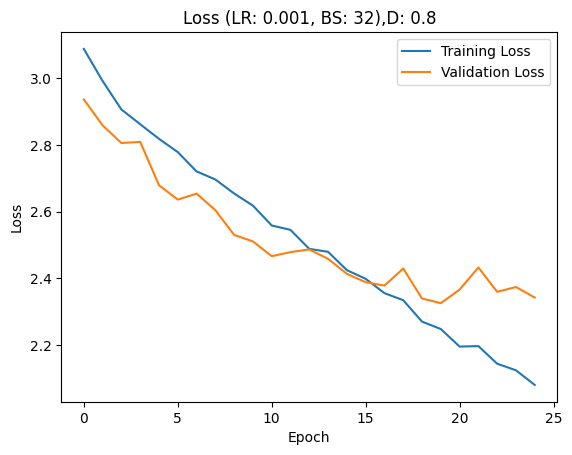

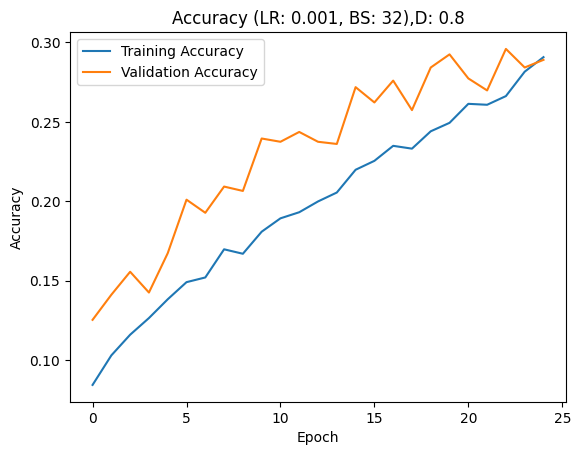

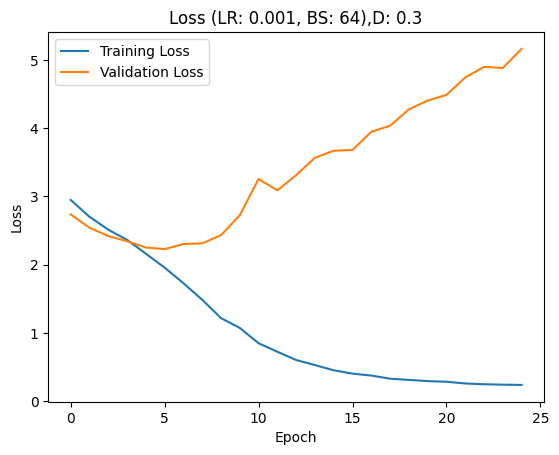

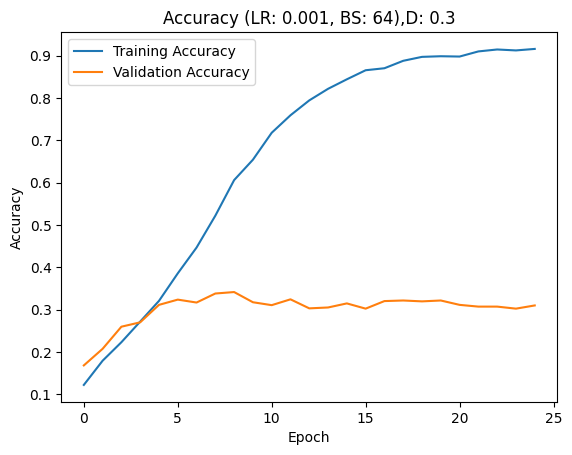

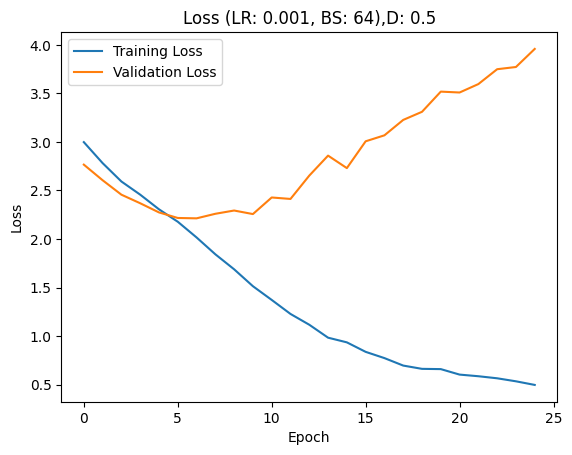

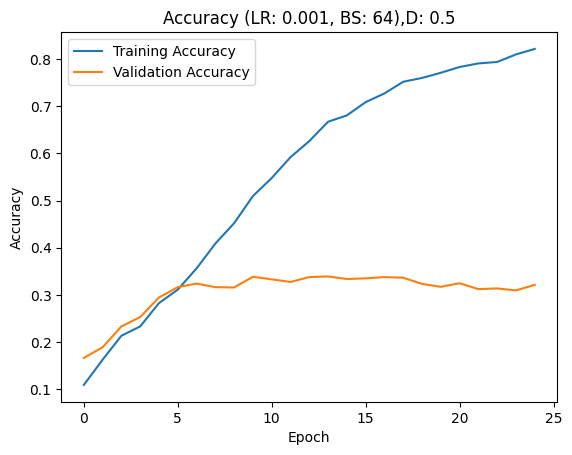

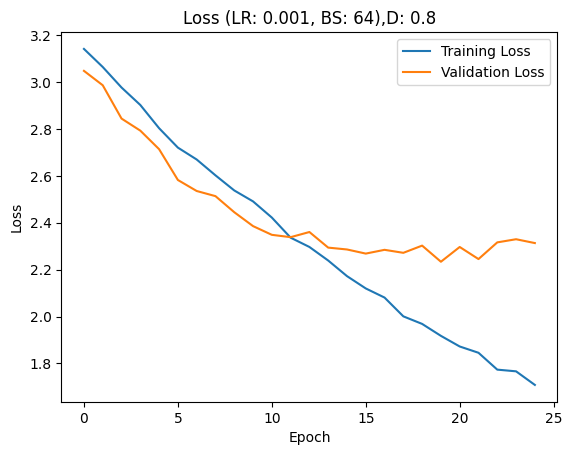

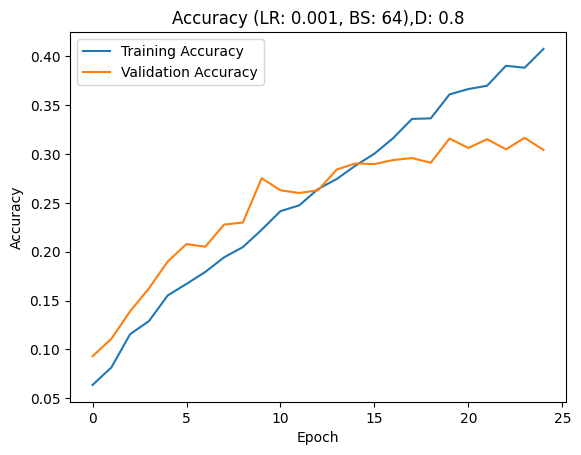

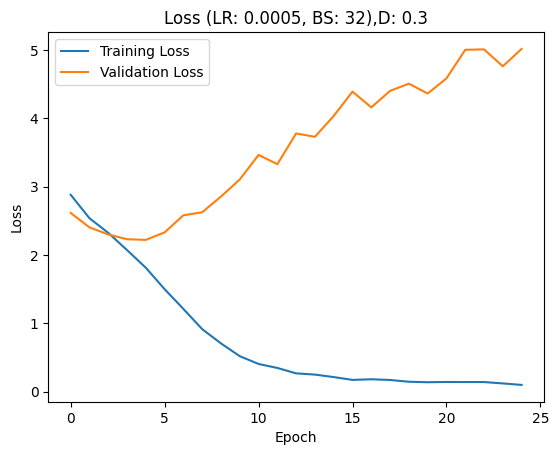

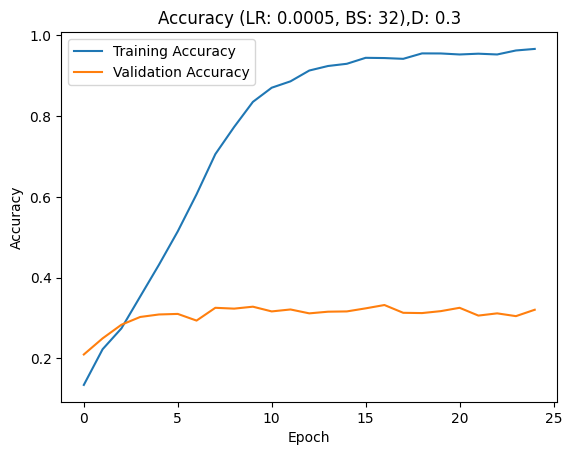

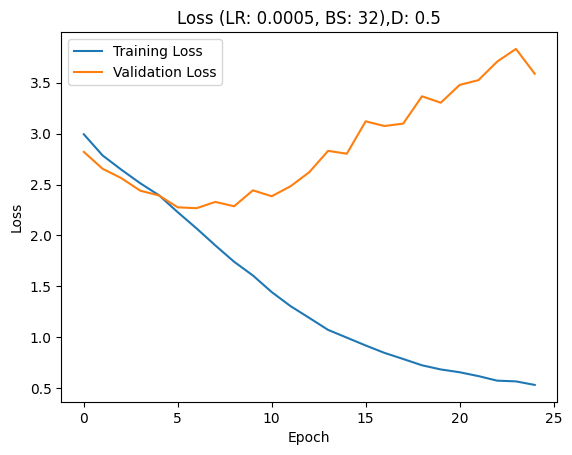

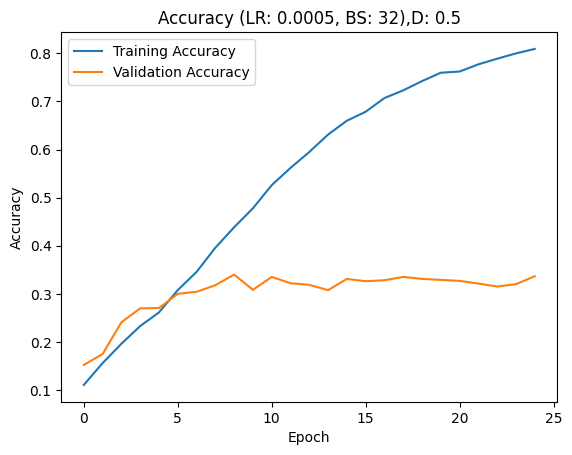

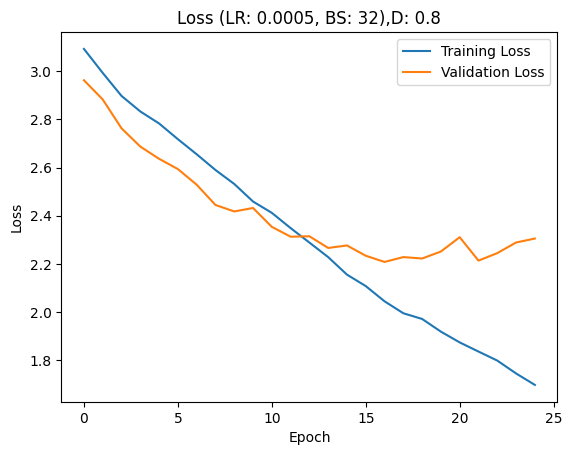

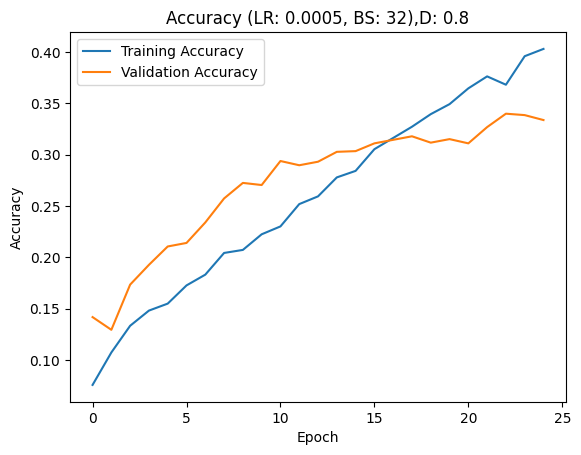

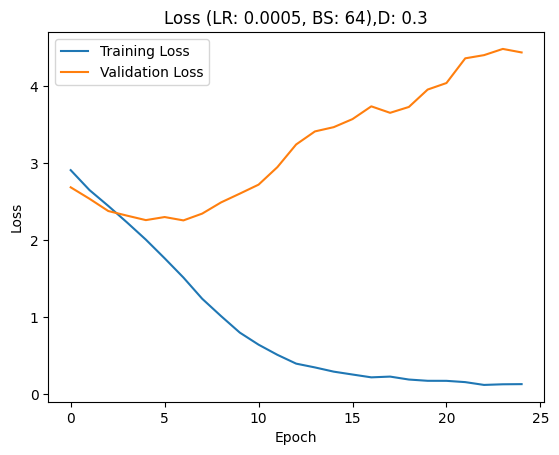

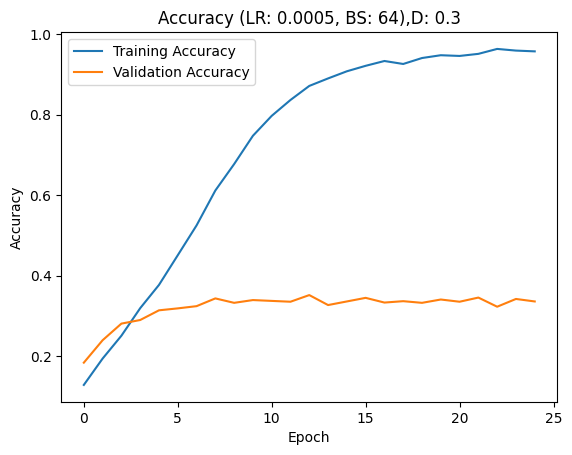

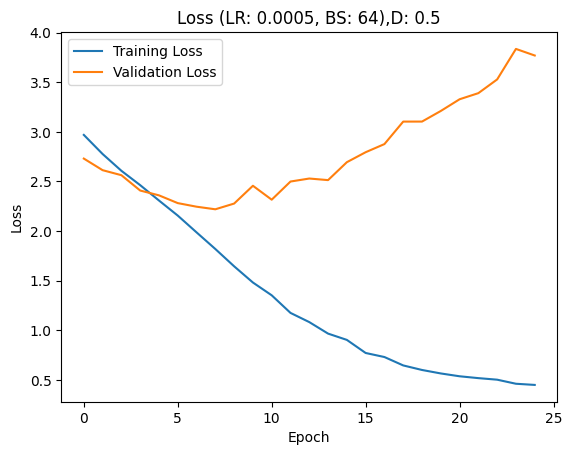

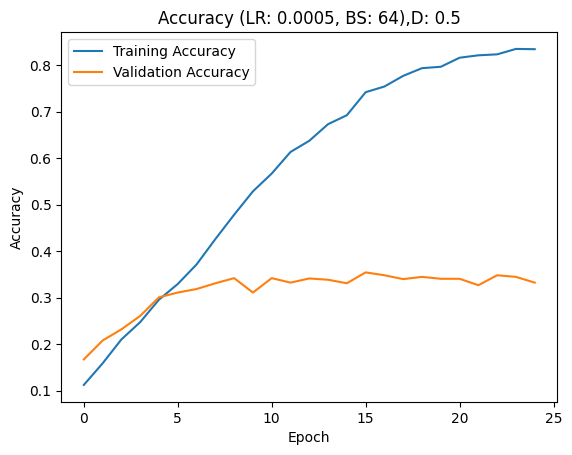

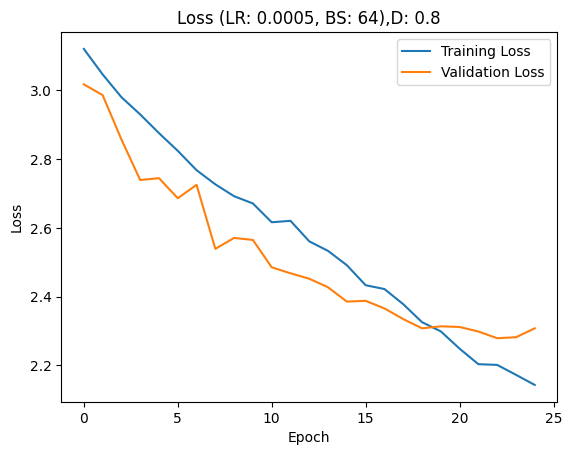

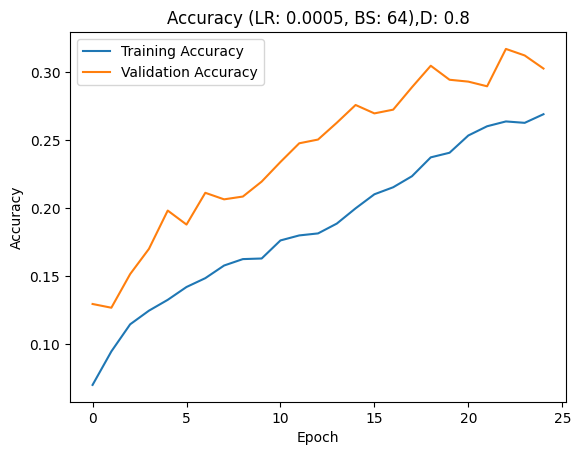

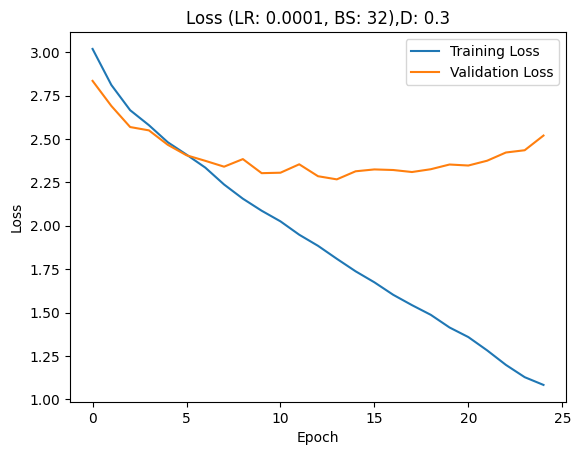

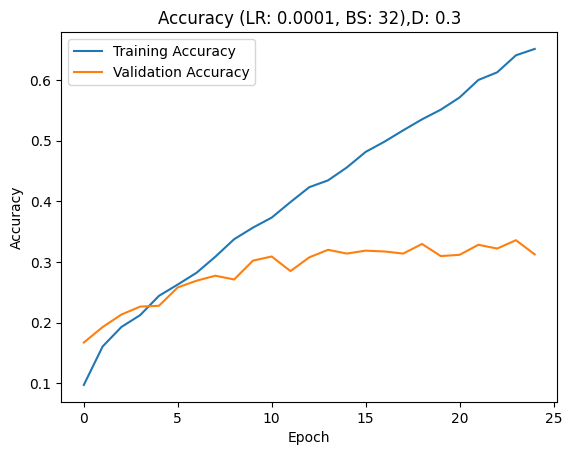

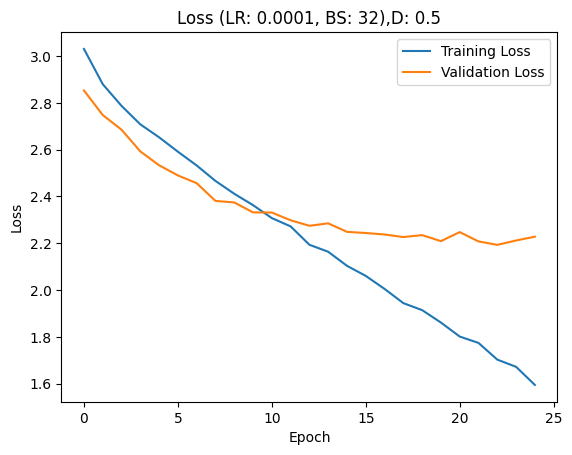

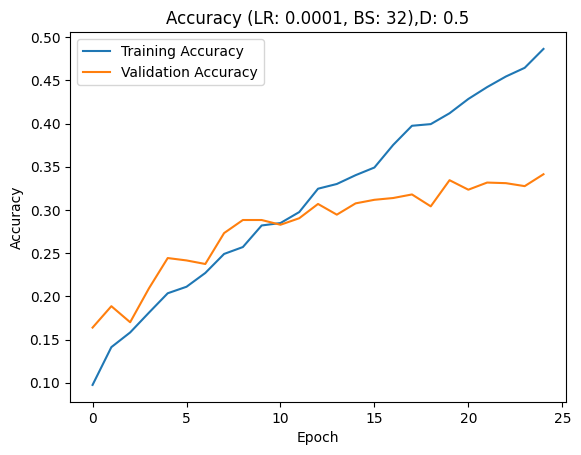

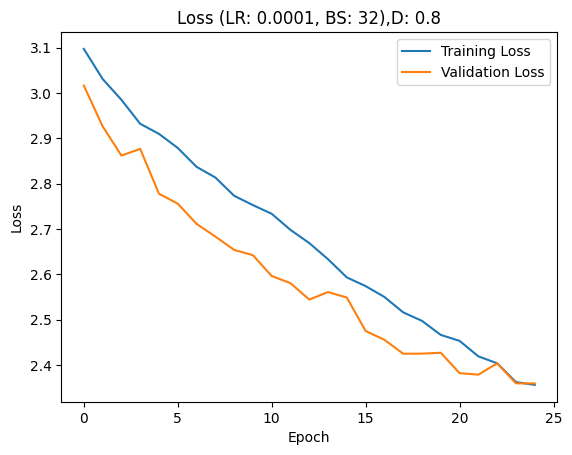

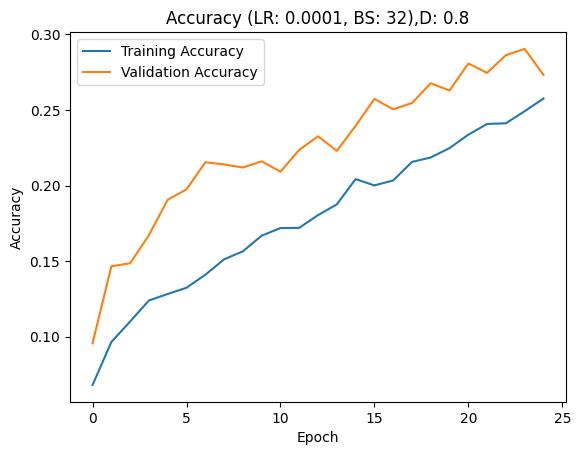

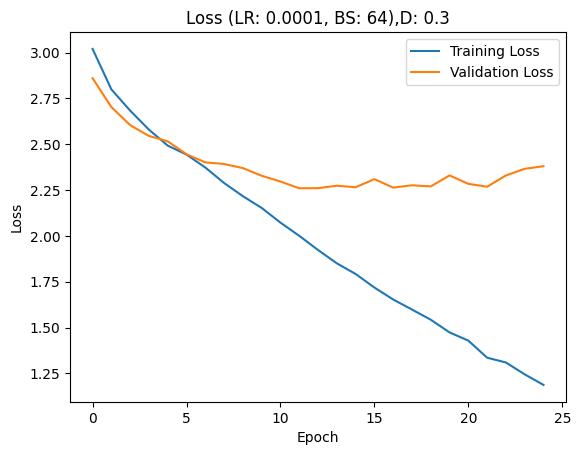

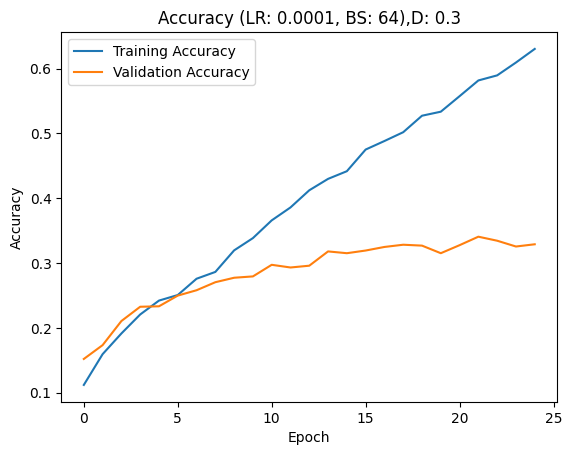

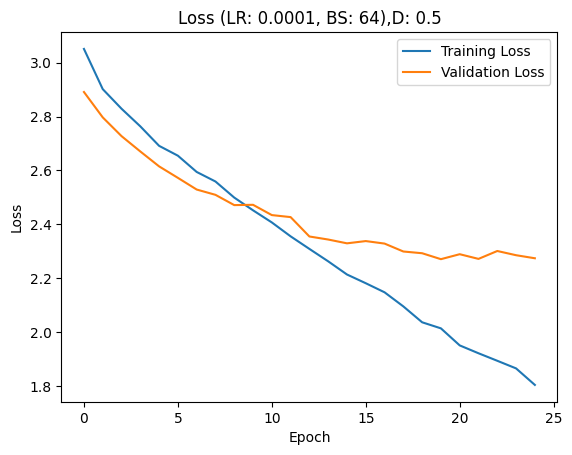

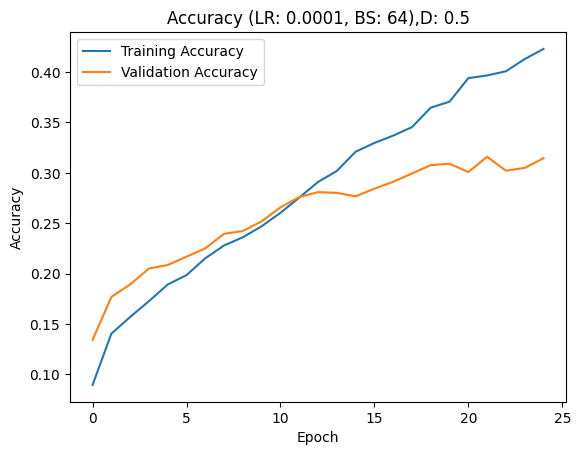

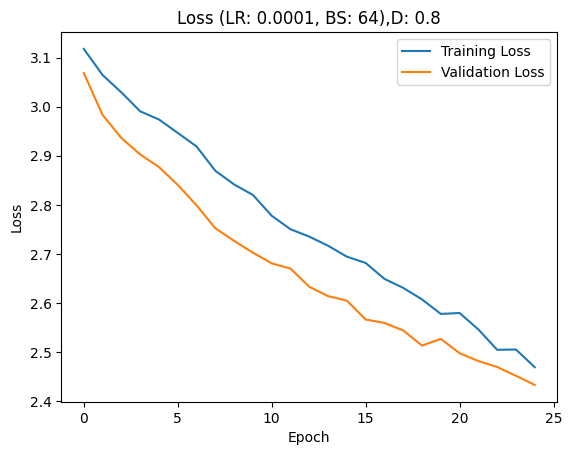

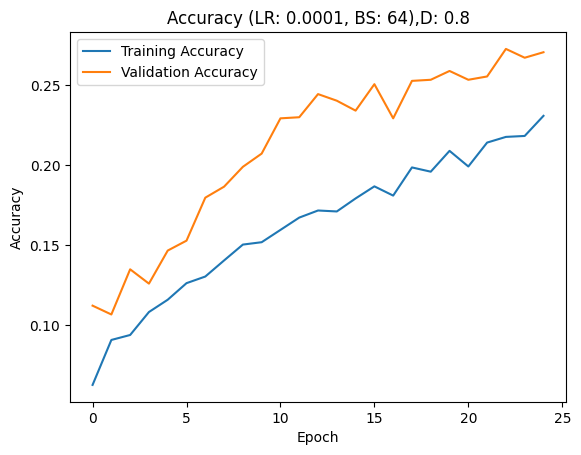

In [19]:
for result in results:
    history=result['history']
    lr=result['lr']
    batch_size=result['batch_size']
    dropout=result['dropout']

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss (LR: {lr}, BS: {batch_size}),D: {dropout}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy (LR: {lr}, BS: {batch_size}),D: {dropout}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [20]:
for result in results:
    print(result['dropout'],result['lr'],result['batch_size'],result['test_acc'], result['test_loss'])

0.3 0.001 32 0.29500341415405273 5.725740909576416
0.3 0.001 32 0.29637235403060913 5.574187278747559
0.5 0.001 32 0.31416836380958557 4.283592224121094
0.8 0.001 32 0.29774126410484314 2.305436849594116
0.3 0.001 64 0.30800822377204895 4.954031944274902
0.5 0.001 64 0.3223819434642792 4.027904510498047
0.8 0.001 64 0.3244353234767914 2.253892660140991
0.3 0.0005 32 0.316906213760376 4.881321430206299
0.5 0.0005 32 0.321697473526001 3.623922824859619
0.8 0.0005 32 0.31006160378456116 2.263253688812256
0.3 0.0005 64 0.3271731734275818 4.428170204162598
0.5 0.0005 64 0.3408624231815338 3.6630234718322754
0.8 0.0005 64 0.30732375383377075 2.274265766143799
0.3 0.0001 32 0.3264887034893036 2.475430965423584
0.5 0.0001 32 0.3299110233783722 2.243551015853882
0.8 0.0001 32 0.2929500341415405 2.3514010906219482
0.3 0.0001 64 0.29500341415405273 2.3957836627960205
0.5 0.0001 64 0.30869266390800476 2.2416574954986572
0.8 0.0001 64 0.2792607843875885 2.4253878593444824


In [24]:
import pandas as pd
results_df=pd.DataFrame(results)
results_df

lr  batch_size                                            history  \
0   0.0010          32  <keras.src.callbacks.history.History object at...   
1   0.0010          32  <keras.src.callbacks.history.History object at...   
2   0.0010          32  <keras.src.callbacks.history.History object at...   
3   0.0010          32  <keras.src.callbacks.history.History object at...   
4   0.0010          64  <keras.src.callbacks.history.History object at...   
5   0.0010          64  <keras.src.callbacks.history.History object at...   
6   0.0010          64  <keras.src.callbacks.history.History object at...   
7   0.0005          32  <keras.src.callbacks.history.History object at...   
8   0.0005          32  <keras.src.callbacks.history.History object at...   
9   0.0005          32  <keras.src.callbacks.history.History object at...   
10  0.0005          64  <keras.src.callbacks.history.History object at...   
11  0.0005          64  <keras.src.callbacks.history.History object at...   
12  0.0005          64  <keras.src.callbacks.history.History object at...   
13  0.0001          32  <keras.src.callbacks.history.History object at...   
14  0.0001          32  <keras.src.callbacks.history.History object at...   
15  0.0001          32  <keras.src.callbacks.history.History object at...   
16  0.0001          64  <keras.src.callbacks.history.History object at...   
17  0.0001          64  <keras.src.callbacks.history.History object at...   
18  0.0001          64  <keras.src.callbacks.history.History object at...   

    test_acc  test_loss  dropout  
0   0.295003   5.725741      0.3  
1   0.296372   5.574187      0.3  
2   0.314168   4.283592      0.5  
3   0.297741   2.305437      0.8  
4   0.308008   4.954032      0.3  
5   0.322382   4.027905      0.5  
6   0.324435   2.253893      0.8  
7   0.316906   4.881321      0.3  
8   0.321697   3.623923      0.5  
9   0.310062   2.263254      0.8  
10  0.327173   4.428170      0.3  
11  0.340862   3.663023      0.5  
12  0.307324   2.274266      0.8  
13  0.326489   2.475431      0.3  
14  0.329911   2.243551      0.5  
15  0.292950   2.351401      0.8  
16  0.295003   2.395784      0.3  
17  0.308693   2.241657      0.5  
18  0.279261   2.425388      0.8

In this part, we were asked to implement CNN classifier from scratch. I build up the model with different parameters and trained the model with them to compare each of them.
I used epochs=25; learning rates as 0.001, 0.0005, 0.0001; batch sizes as 32, 64; dropouts as 0.3, 0.5, 0.8 . I calculated loss and accuracy for each case and then visualized them to see results better.
For a general comment, most cases have a bit overfitting problem. The difference between training accuracy and validation accuracy is high, it shows that model has low ability to generalize. 
The accuracies are close for each case, but I got the best accuracy while learning rate is 0.0005. Test loss is lower while learning rate is 0.0001. For high learning rate, model optimized faster but it has highest test loss. 
Because of high running times, I tested model with 3 dropout values. Low dropout(0.3) value was ineffective against overfitting. Middle dropout value(0.5) generated the best results. High dropout value(0.8) caused low performance due to excessive dropout usage.
I also plotted confussion matrix for each case. As I seen from them: Class imbalance may have challenged the model. Even at the highest accuracy, some classes were not correctly predicted.
To get better results; more data may be used, data augmentation may be applied, increasing image quality may increase the accuracies, more optimal parameters may be used.